# **LIBRARY**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import euclidean

# **DATA UNDERSTANDING**

In [ ]:
df = pd.read_csv('cardio_train.csv', delimiter=';')

In [ ]:
# B·ªè c·ªôt 'id' v√¨ n√≥ kh√¥ng c·∫ßn thi·∫øt cho vi·ªác gom c·ª•m
if not df.empty and 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("C·ªôt 'id' ƒë√£ ƒë∆∞·ª£c lo·∫°i b·ªè.")
elif not df.empty:
    print("Kh√¥ng t√¨m th·∫•y c·ªôt 'id' ƒë·ªÉ lo·∫°i b·ªè.")

print("\n--- 5 d√≤ng ƒë·∫ßu ti√™n c·ªßa d·ªØ li·ªáu ---")
if not df.empty:
    print(df.head())
else:
    print("DataFrame r·ªóng, kh√¥ng th·ªÉ hi·ªÉn th·ªã .head()")


print("\n--- Th√¥ng tin t·ªïng quan v·ªÅ d·ªØ li·ªáu ---")
if not df.empty:
    df.info()
    print("\n--> Th√¥ng tin n√†y cho bi·∫øt s·ªë l∆∞·ª£ng Non-Null (kh√¥ng tr·ªëng) c·ªßa m·ªói c·ªôt v√† ki·ªÉu d·ªØ li·ªáu c·ªßa ch√∫ng.")
else:
    print("DataFrame r·ªóng, kh√¥ng th·ªÉ hi·ªÉn th·ªã .info()")


print("\n--- K√≠ch th∆∞·ªõc c·ªßa t·∫≠p d·ªØ li·ªáu ---")
if not df.empty:
    print(f"T·∫≠p d·ªØ li·ªáu c√≥ {df.shape[0]} d√≤ng (quan s√°t) v√† {df.shape[1]} c·ªôt (ƒë·∫∑c tr∆∞ng).")
else:
    print("DataFrame r·ªóng, kh√¥ng c√≥ k√≠ch th∆∞·ªõc ƒë·ªÉ hi·ªÉn th·ªã.")


print("\n--- Ki·ªÉm tra gi√° tr·ªã thi·∫øu ---")
if not df.empty:
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu (NaN) trong t·∫≠p d·ªØ li·ªáu.")
    else:
        print("C√°c c·ªôt c√≥ gi√° tr·ªã thi·∫øu:")
else:
    print("DataFrame r·ªóng, kh√¥ng th·ªÉ ki·ªÉm tra gi√° tr·ªã thi·∫øu.")

C·ªôt 'id' ƒë√£ ƒë∆∞·ª£c lo·∫°i b·ªè.

--- 5 d√≤ng ƒë·∫ßu ti√™n c·ªßa d·ªØ li·ªáu ---
     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

--- Th√¥ng tin t·ªïng quan v·ªÅ d·ªØ li·ªáu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender      

In [ ]:
print("\n--- Th·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë ---")
print(df.describe())

# Chuy·ªÉn ƒë·ªïi 'age' t·ª´ ng√†y sang nƒÉm
# Ki·ªÉm tra xem 'age_years' ƒë√£ ƒë∆∞·ª£c t·∫°o ch∆∞a ƒë·ªÉ tr√°nh t·∫°o l·∫°i n·∫øu cell ƒë∆∞·ª£c ch·∫°y nhi·ªÅu l·∫ßn
if 'age_years' not in df.columns:
    df['age_years'] = round(df['age'] / 365.25).astype(int)
    print("\n--- Th·ªëng k√™ m√¥ t·∫£ cho 'age' sau khi chuy·ªÉn ƒë·ªïi sang nƒÉm ---")
    print(df['age_years'].describe())

    print("\n--- Th·ªëng k√™ chi ti·∫øt cho c√°c c·ªôt ph√¢n lo·∫°i ---")
    # C√°c c·ªôt ph√¢n lo·∫°i (bao g·ªìm c·∫£ bi·∫øn nh·ªã ph√¢n)
    categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

    for col in categorical_cols:
        print(f"\n--- Th·ªëng k√™ cho c·ªôt: {col} ---")
        print(df[col].value_counts())
        print(f"T·ª∑ l·ªá ph·∫ßn trƒÉm cho c·ªôt {col}:")
        print(df[col].value_counts(normalize=True) * 100)

    print("\n--- Ki·ªÉm tra c√°c gi√° tr·ªã b·∫•t th∆∞·ªùng trong Huy·∫øt √°p  ---")
    # ƒê√¢y l√† tr·ªçng t√¢m ch√≠nh c·ªßa d·ª± √°n, c·∫ßn ph√¢n t√≠ch k·ªπ l∆∞·ª°ng
    print(f"S·ªë l∆∞·ª£ng b·∫£n ghi c√≥ ap_hi < ap_lo: {len(df[df['ap_hi'] < df['ap_lo']])} (L·ªói logic nghi√™m tr·ªçng)")
    print(f"S·ªë l∆∞·ª£ng b·∫£n ghi c√≥ ap_hi qu√° cao (tr√™n 250 mmHg): {len(df[df['ap_hi'] > 250])}")
    print(f"S·ªë l∆∞·ª£ng b·∫£n ghi c√≥ ap_lo qu√° cao (tr√™n 200 mmHg): {len(df[df['ap_lo'] > 200])}")
    print(f"S·ªë l∆∞·ª£ng b·∫£n ghi c√≥ ap_hi qu√° th·∫•p (d∆∞·ªõi 70 mmHg): {len(df[df['ap_hi'] < 70])}")
    print(f"S·ªë l∆∞·ª£ng b·∫£n ghi c√≥ ap_lo qu√° th·∫•p (d∆∞·ªõi 40 mmHg): {len(df[df['ap_lo'] < 40])}")


--- Th·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë ---
                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
s

T·∫°o 'bmi' v√¨ ch∆∞a ƒë∆∞·ª£c t·∫°o.

--- Ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng  ---


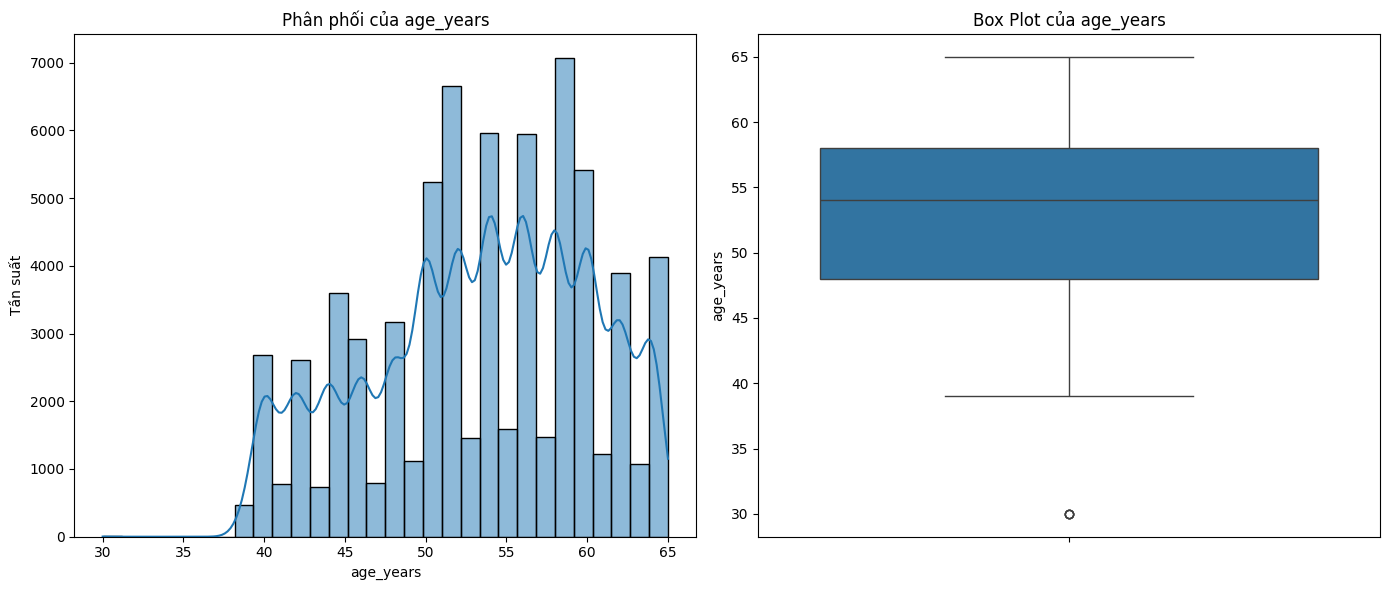

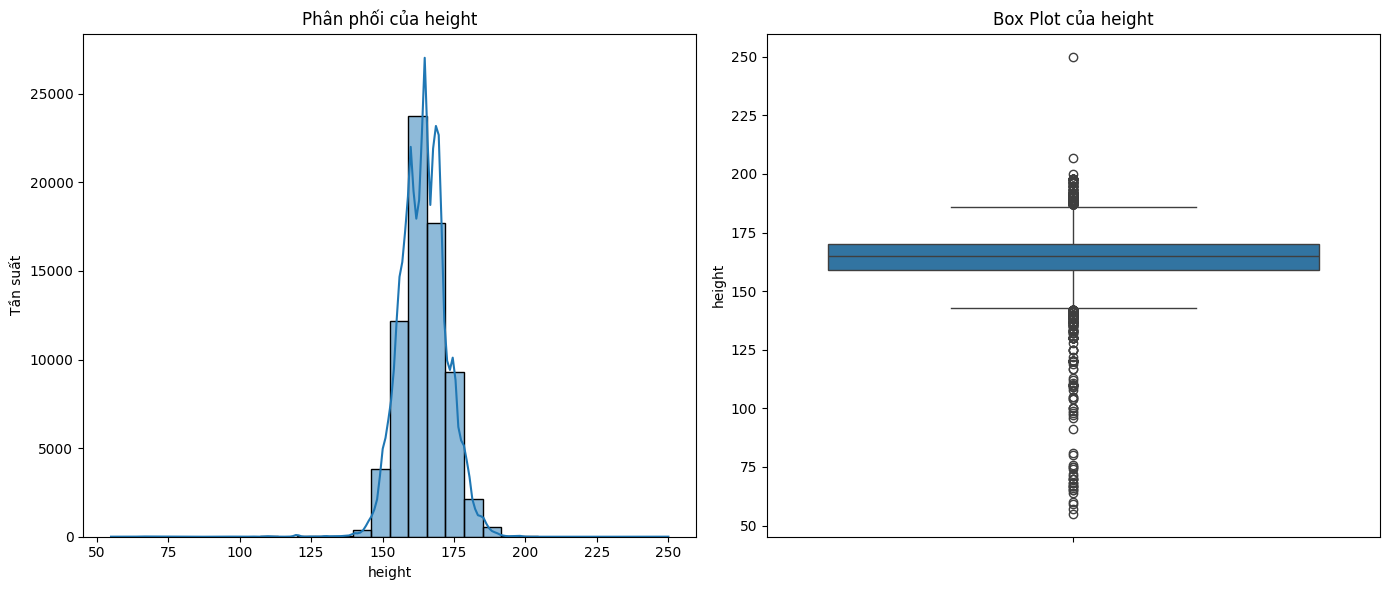

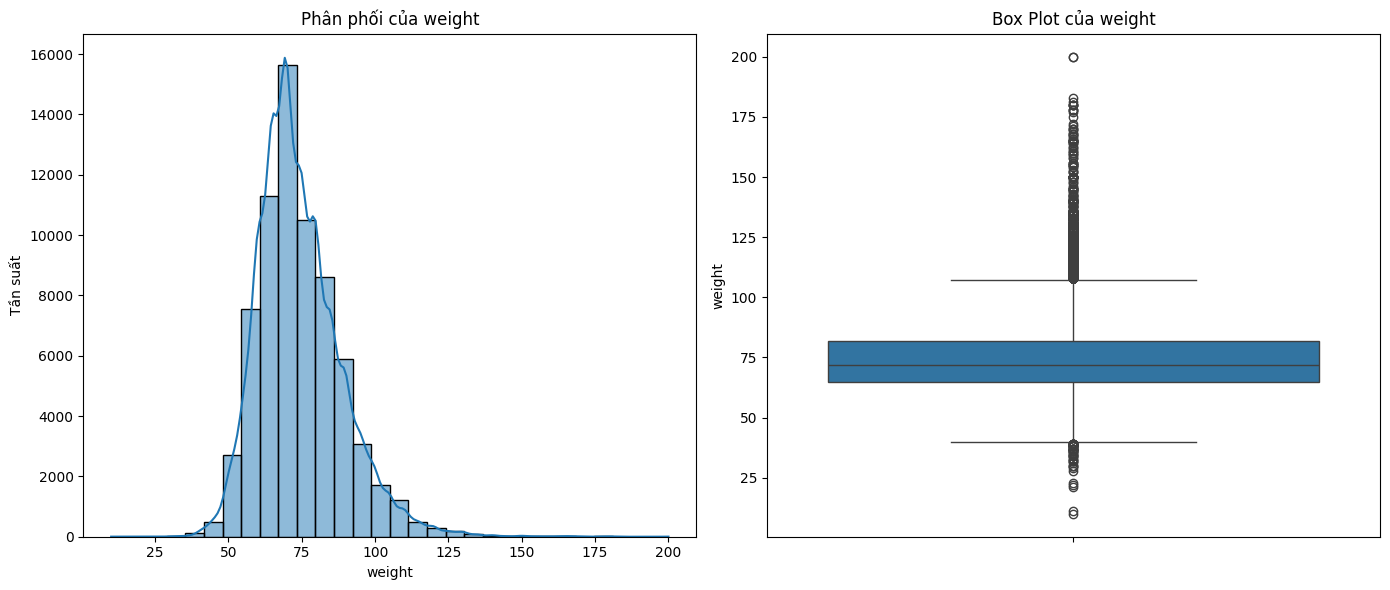

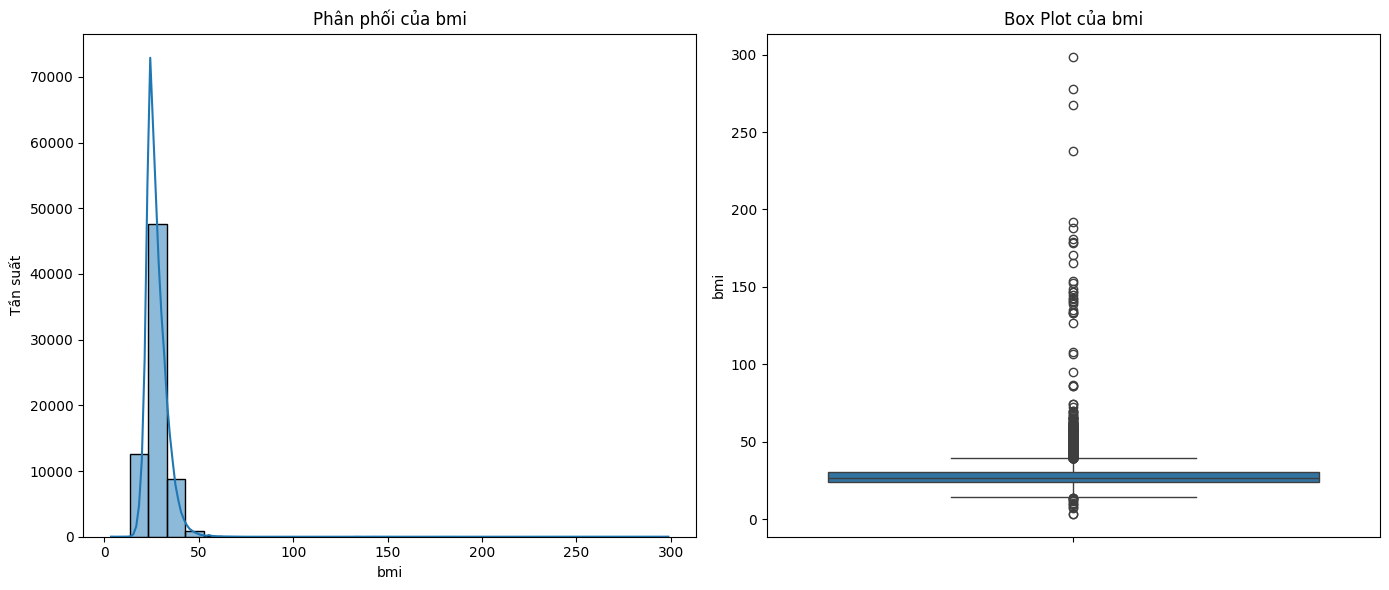

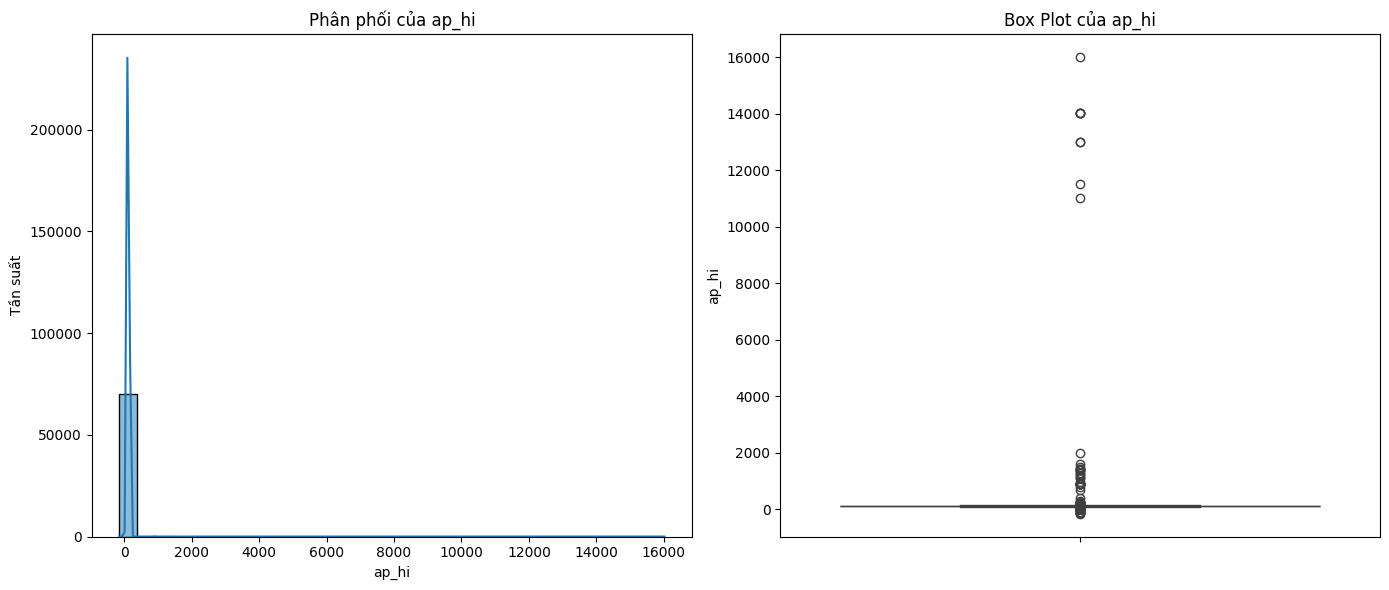

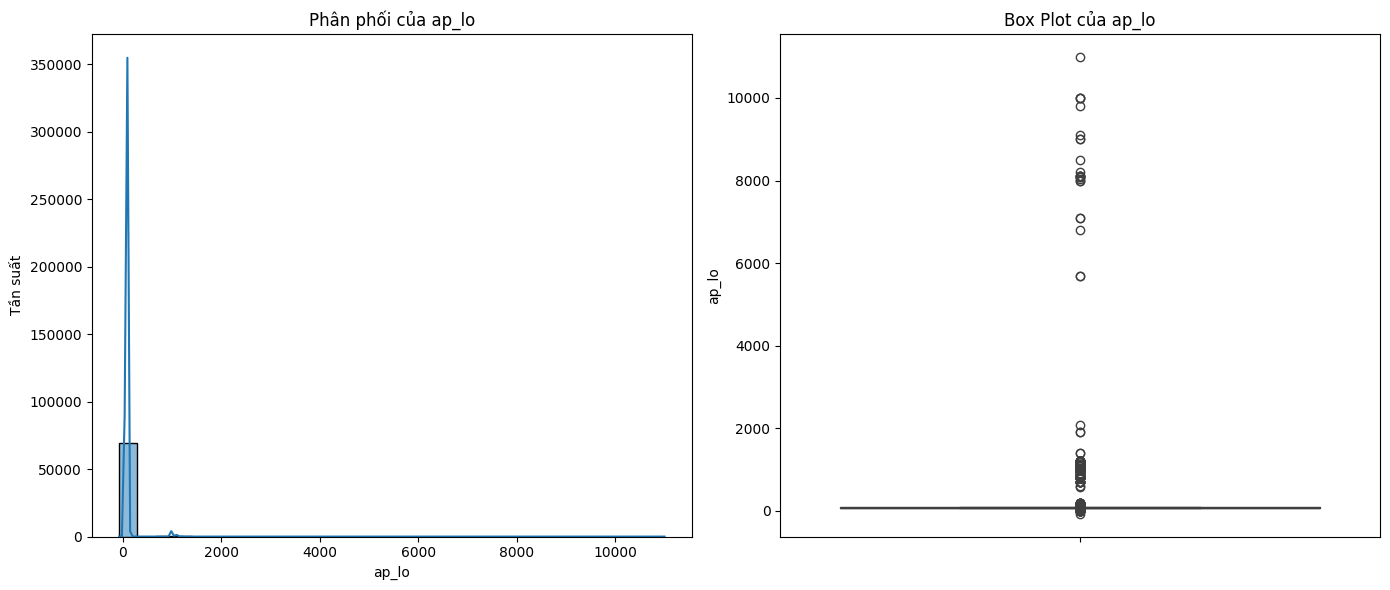


--- Ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ph√¢n lo·∫°i ---


/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


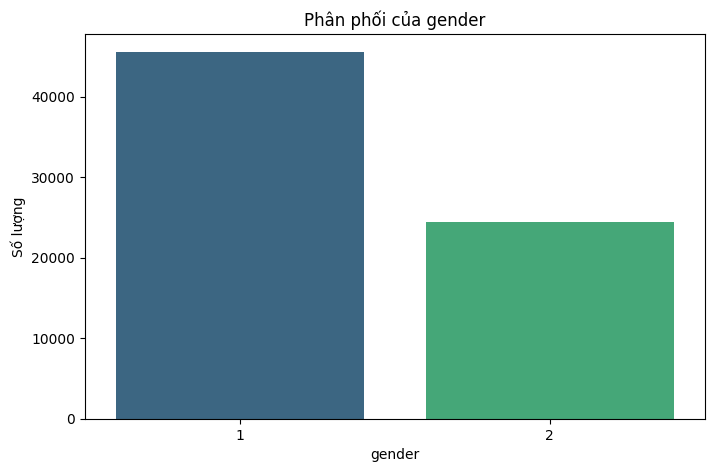

/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


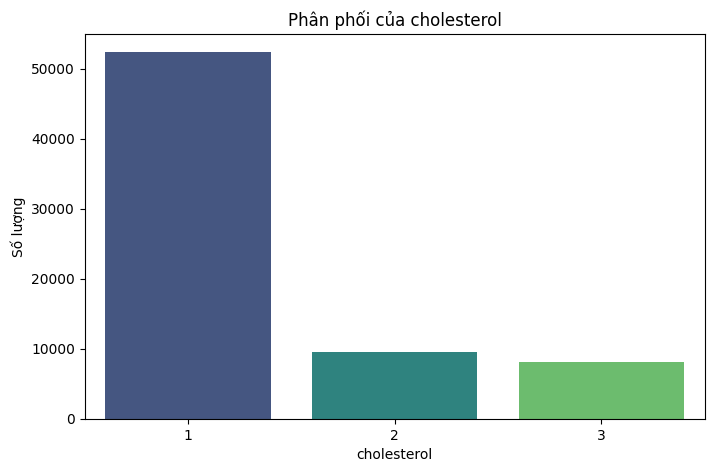

/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


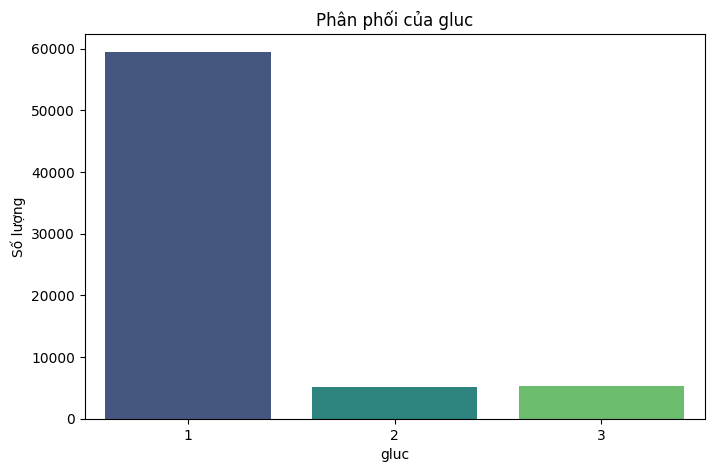

/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


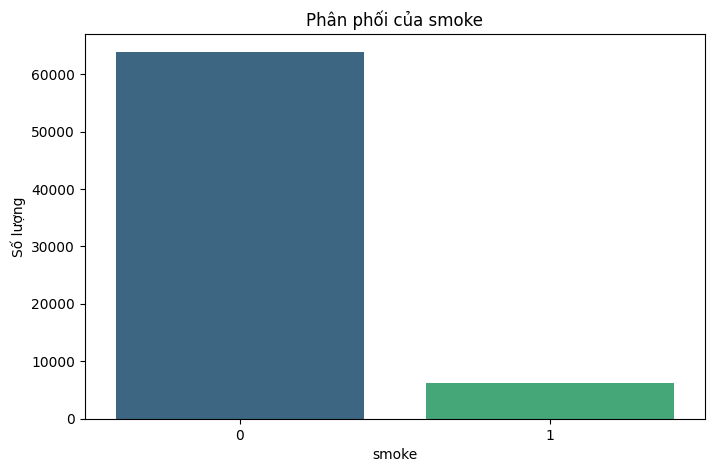

/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


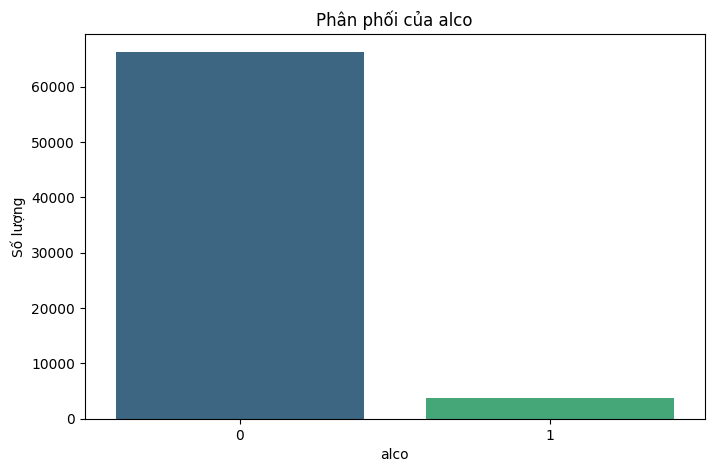

/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


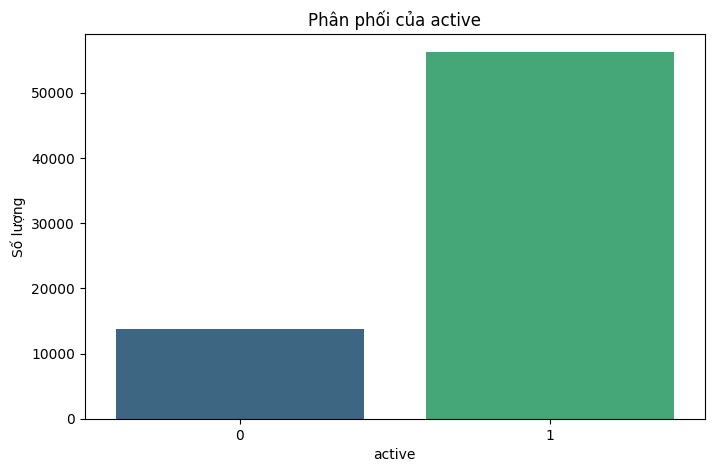

/tmp/ipython-input-8-3196065484.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')


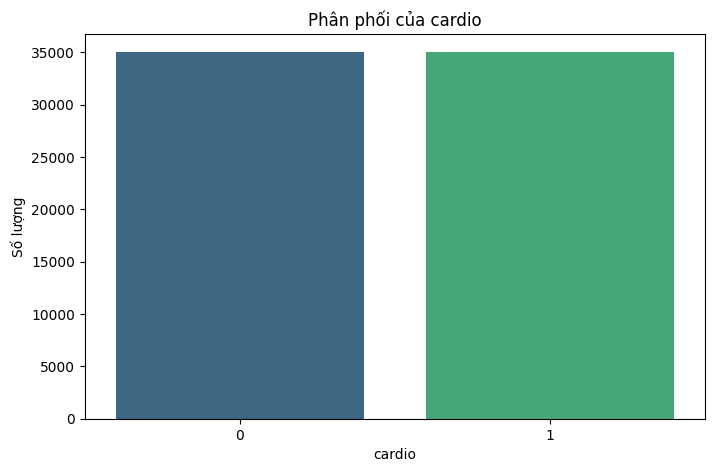


--- Tr·ª±c quan h√≥a m·ªëi quan h·ªá gi·ªØa ap_hi v√† ap_lo ---


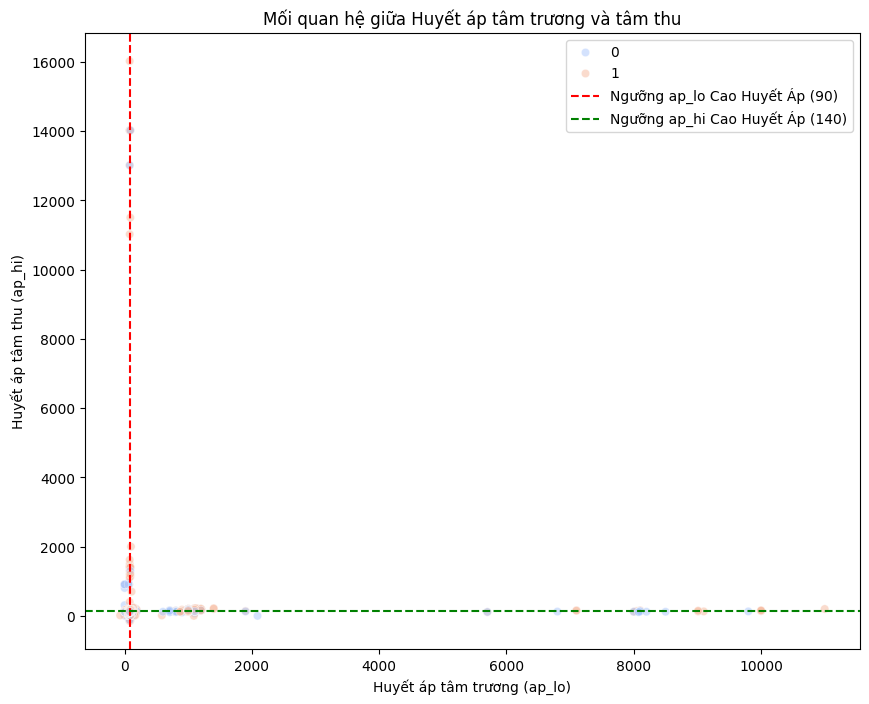


--- Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng (bao g·ªìm ap_hi, ap_lo) ---


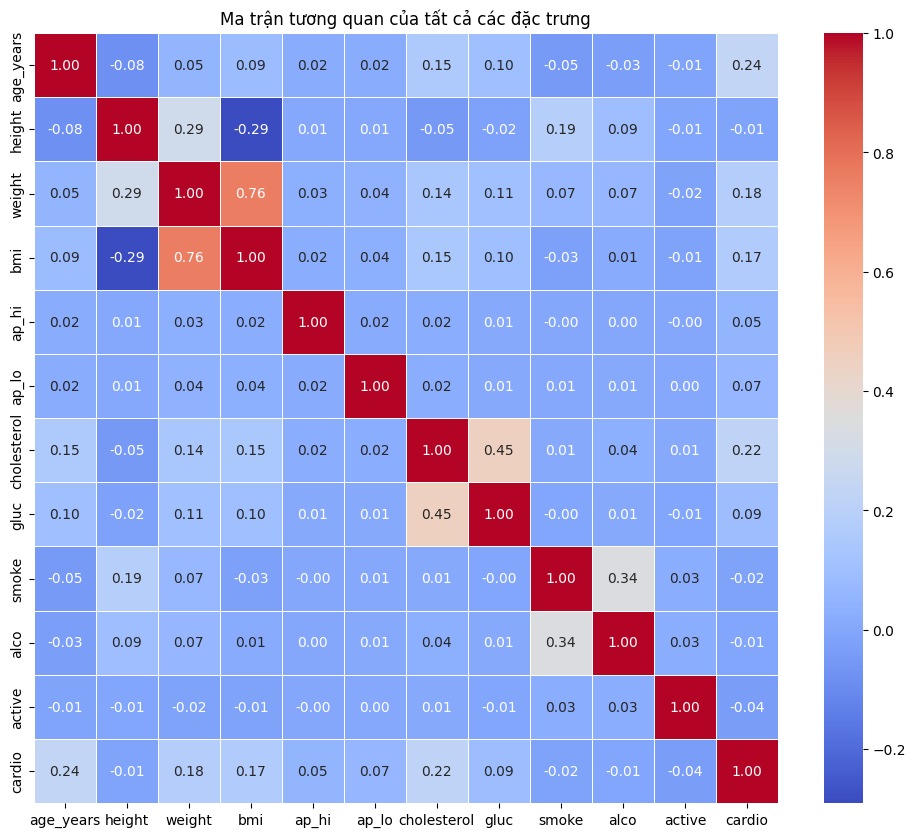


--- M·ªëi quan h·ªá c·ªßa c√°c ƒë·∫∑c tr∆∞ng kh√°c v·ªõi ap_hi v√† ap_lo ---


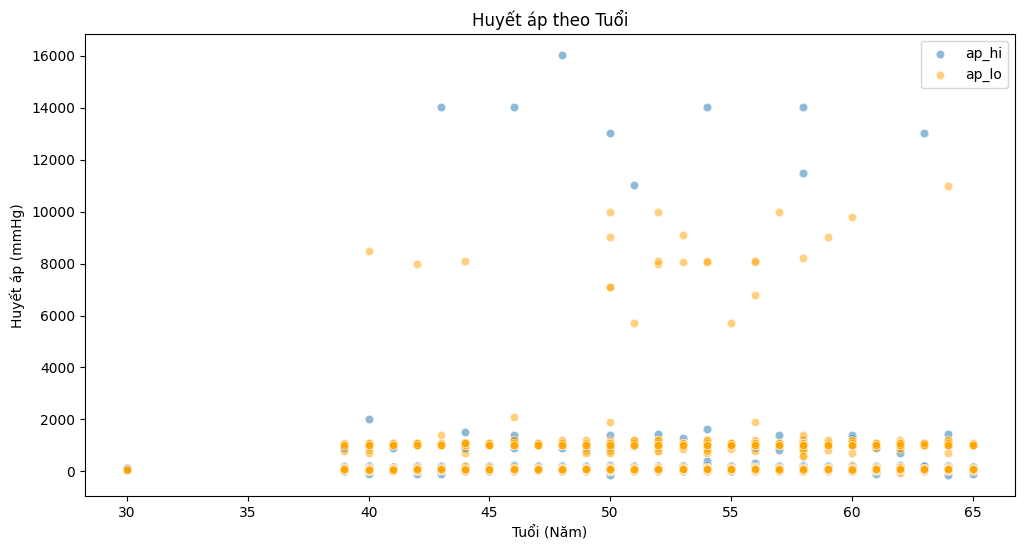

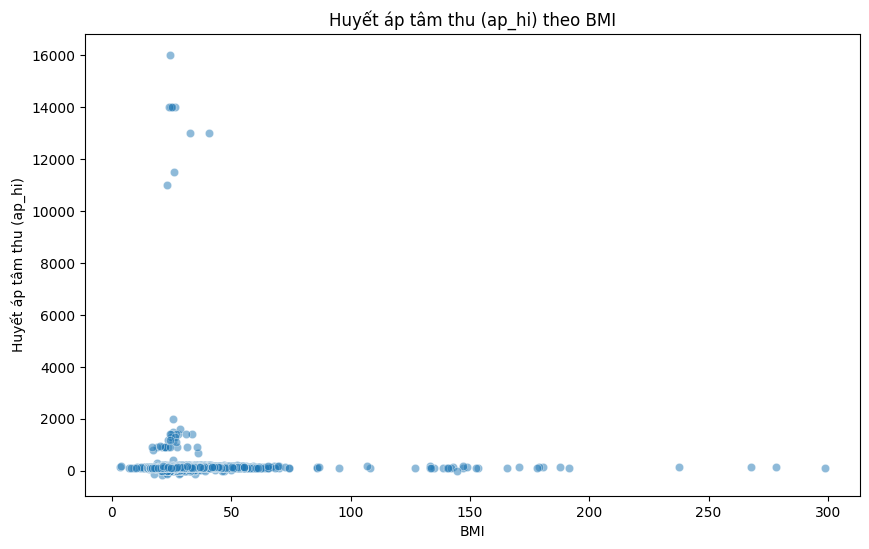

/tmp/ipython-input-8-3196065484.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cholesterol', y='ap_hi', data=df, palette='pastel')
/tmp/ipython-input-8-3196065484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cholesterol', y='ap_lo', data=df, palette='pastel')


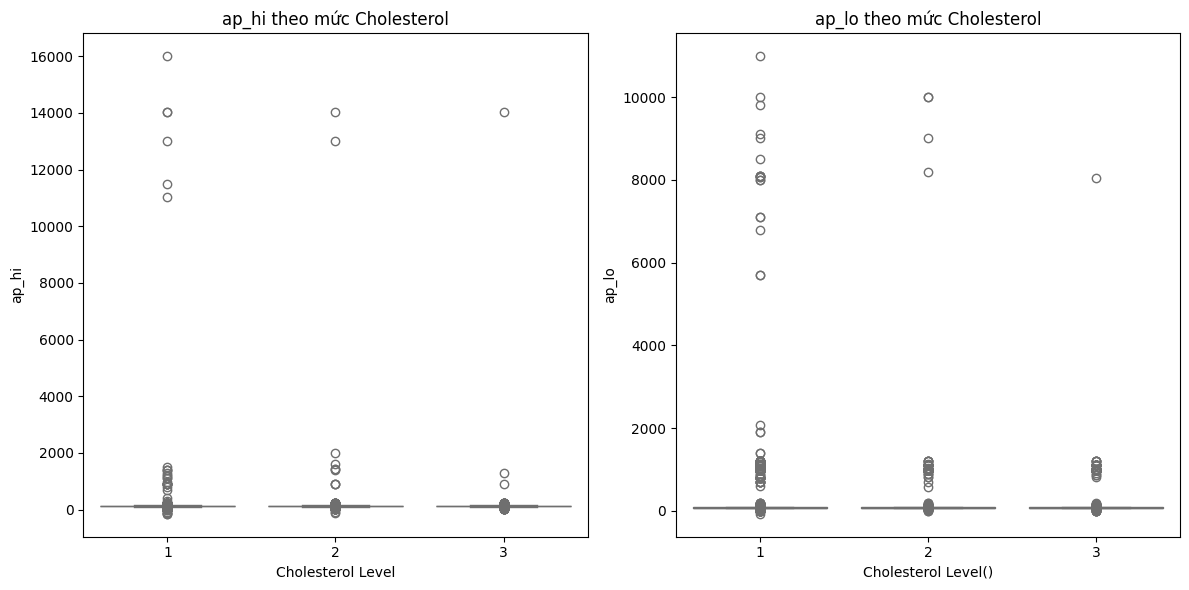

/tmp/ipython-input-8-3196065484.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='ap_hi', data=df, palette='coolwarm')
/tmp/ipython-input-8-3196065484.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='ap_lo', data=df, palette='coolwarm')


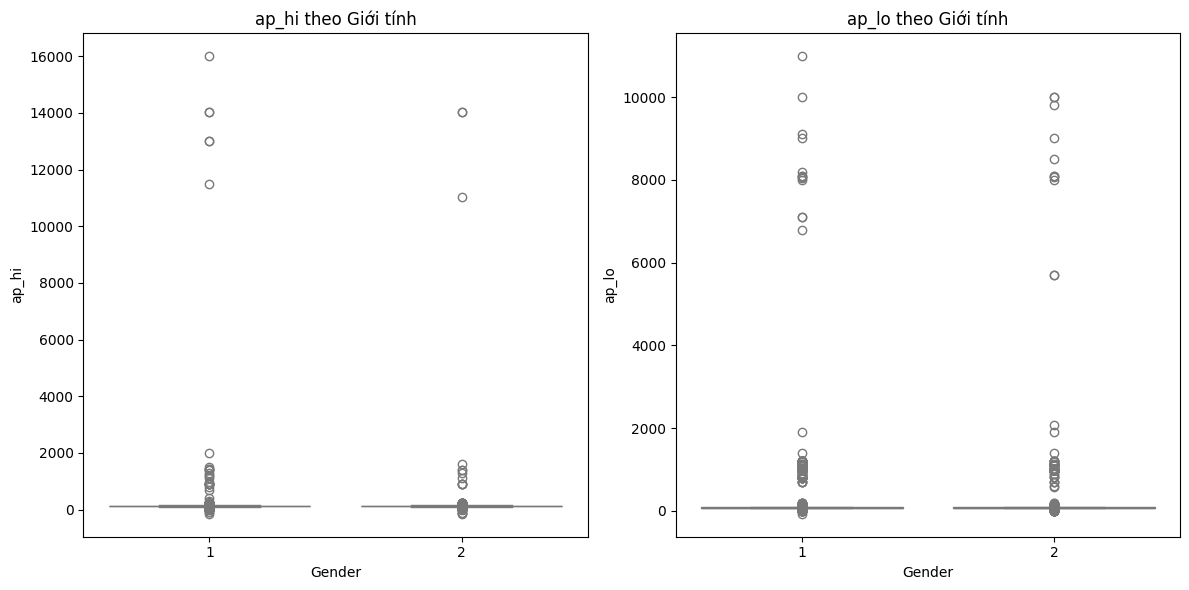

/tmp/ipython-input-8-3196065484.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_hi', data=df, palette='viridis')
/tmp/ipython-input-8-3196065484.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_lo', data=df, palette='viridis')


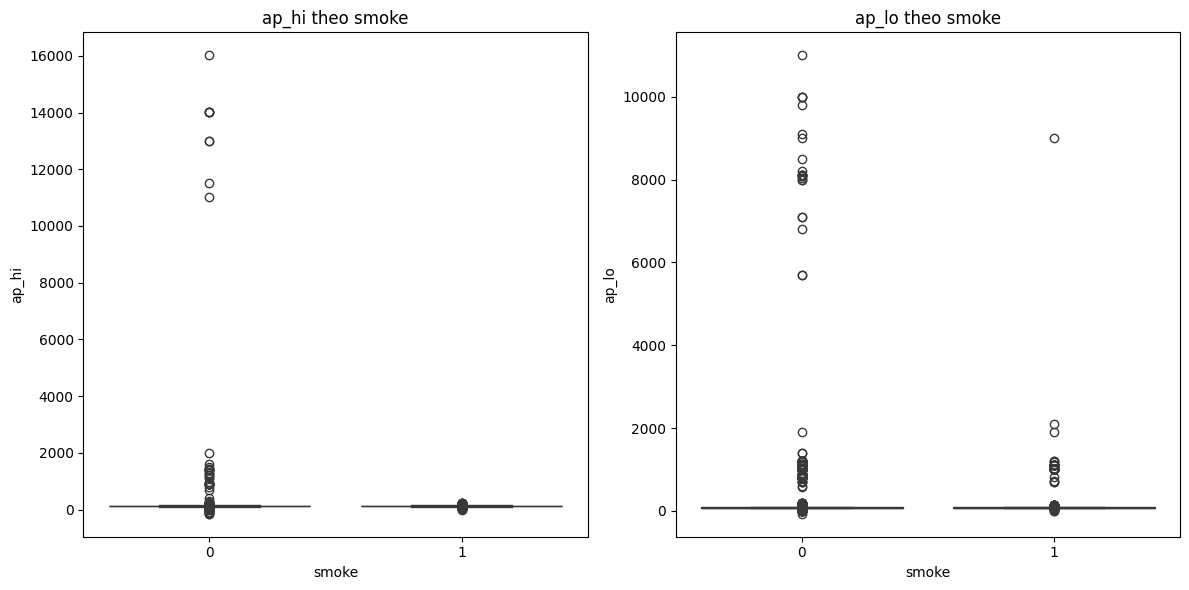

/tmp/ipython-input-8-3196065484.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_hi', data=df, palette='viridis')
/tmp/ipython-input-8-3196065484.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_lo', data=df, palette='viridis')


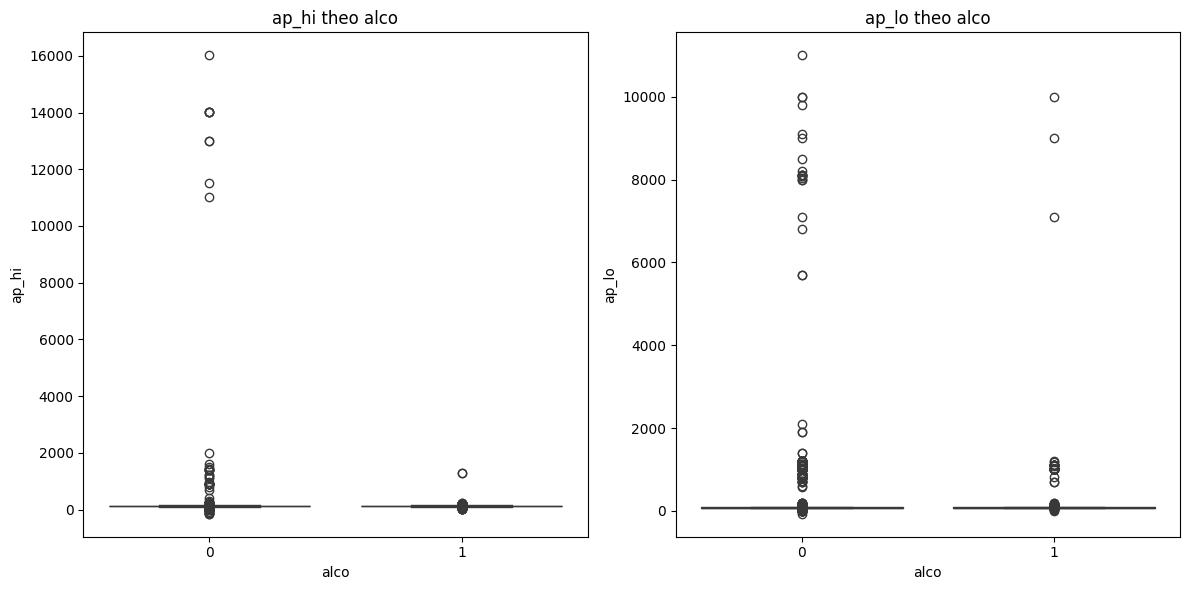

/tmp/ipython-input-8-3196065484.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_hi', data=df, palette='viridis')
/tmp/ipython-input-8-3196065484.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_lo', data=df, palette='viridis')


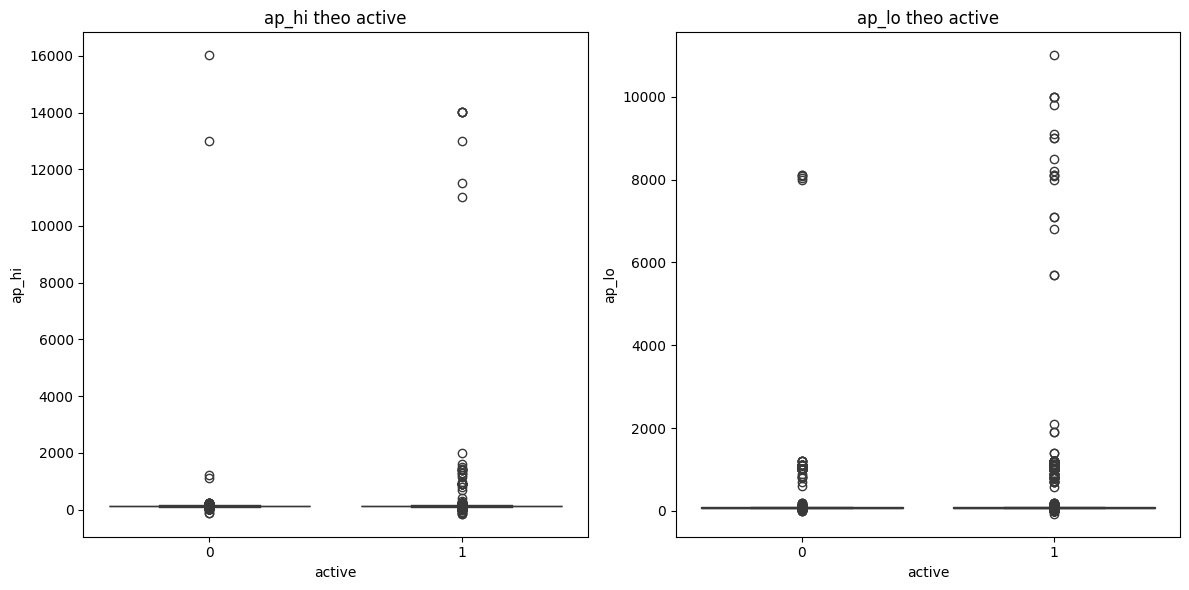

/tmp/ipython-input-8-3196065484.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_hi', data=df, palette='viridis')
/tmp/ipython-input-8-3196065484.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='ap_lo', data=df, palette='viridis')


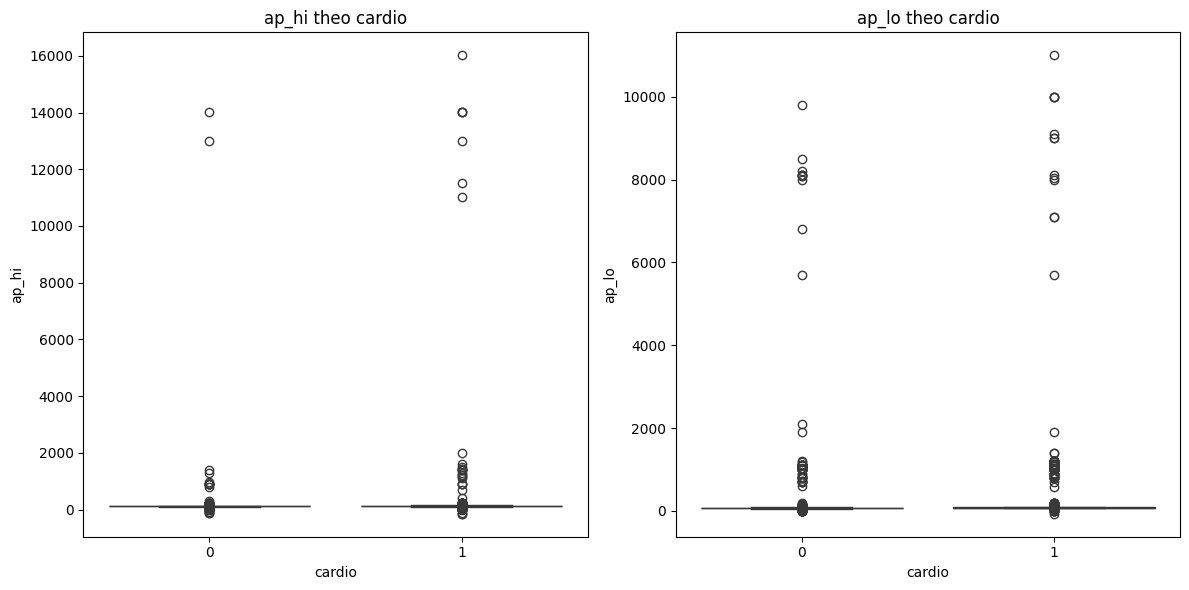

In [ ]:
if df.empty:
    print("DataFrame r·ªóng, kh√¥ng th·ªÉ th·ª±c hi·ªán tr·ª±c quan h√≥a d·ªØ li·ªáu. Vui l√≤ng ki·ªÉm tra Cell 1.")
else:
    if 'age_years' not in df.columns:
        df['age_years'] = round(df['age'] / 365.25).astype(int)
        print("T·∫°o 'age_years' v√¨ ch∆∞a ƒë∆∞·ª£c t·∫°o.")
    if 'bmi' not in df.columns:
        df['bmi'] = df['weight'] / (df['height'] / 100)**2
        print("T·∫°o 'bmi' v√¨ ch∆∞a ƒë∆∞·ª£c t·∫°o.")

    # Ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng
    print("\n--- Ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ƒë·ªãnh l∆∞·ª£ng  ---")
    numeric_features = ['age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo']

    for feature in numeric_features:
        plt.figure(figsize=(14, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Ph√¢n ph·ªëi c·ªßa {feature}')
        plt.xlabel(feature)
        plt.ylabel('T·∫ßn su·∫•t')

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[feature])
        plt.title(f'Box Plot c·ªßa {feature}')
        plt.ylabel(feature)

        plt.tight_layout()
        plt.show()

    print("\n--- Ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn ph√¢n lo·∫°i ---")
    categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
    for feature in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=feature, data=df, palette='viridis')
        plt.title(f'Ph√¢n ph·ªëi c·ªßa {feature}')
        plt.xlabel(feature)
        plt.ylabel('S·ªë l∆∞·ª£ng')
        plt.show()

    #  Tr·ª±c quan h√≥a m·ªëi quan h·ªá gi·ªØa ap_hi v√† ap_lo (R·∫•t quan tr·ªçng cho gom c·ª•m cao huy·∫øt √°p)
    print("\n--- Tr·ª±c quan h√≥a m·ªëi quan h·ªá gi·ªØa ap_hi v√† ap_lo ---")
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='ap_lo', y='ap_hi', data=df, alpha=0.5, hue='cardio', palette='coolwarm')
    plt.title('M·ªëi quan h·ªá gi·ªØa Huy·∫øt √°p t√¢m tr∆∞∆°ng v√† t√¢m thu')
    plt.xlabel('Huy·∫øt √°p t√¢m tr∆∞∆°ng (ap_lo)')
    plt.ylabel('Huy·∫øt √°p t√¢m thu (ap_hi)')
    plt.axvline(x=90, color='r', linestyle='--', label='Ng∆∞·ª°ng ap_lo Cao Huy·∫øt √Åp (90)') # Ng∆∞·ª°ng HATT >= 90
    plt.axhline(y=140, color='g', linestyle='--', label='Ng∆∞·ª°ng ap_hi Cao Huy·∫øt √Åp (140)') # Ng∆∞·ª°ng HAT thu >= 140
    plt.legend()
    plt.show()

    # Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa T·∫§T C·∫¢ c√°c bi·∫øn ƒë·ªÉ t√¨m m·ªëi quan h·ªá v·ªõi ap_hi v√† ap_lo
    print("\n--- Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng (bao g·ªìm ap_hi, ap_lo) ---")
    all_numeric_for_corr = ['age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo',
                            'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
    correlation_matrix_all = df[all_numeric_for_corr].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Ma tr·∫≠n t∆∞∆°ng quan c·ªßa t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng')
    plt.show()

    # M·ªëi quan h·ªá c·ªßa c√°c ƒë·∫∑c tr∆∞ng v·ªõi ap_hi v√† ap_lo
    print("\n--- M·ªëi quan h·ªá c·ªßa c√°c ƒë·∫∑c tr∆∞ng kh√°c v·ªõi ap_hi v√† ap_lo ---")

    # Tu·ªïi vs Huy·∫øt √°p
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='age_years', y='ap_hi', data=df, alpha=0.5, label='ap_hi')
    sns.scatterplot(x='age_years', y='ap_lo', data=df, alpha=0.5, label='ap_lo', color='orange')
    plt.title('Huy·∫øt √°p theo Tu·ªïi')
    plt.xlabel('Tu·ªïi (NƒÉm)')
    plt.ylabel('Huy·∫øt √°p (mmHg)')
    plt.legend()
    plt.show()


    # BMI vs Huy·∫øt √°p
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='bmi', y='ap_hi', data=df, alpha=0.5)
    plt.title('Huy·∫øt √°p t√¢m thu (ap_hi) theo BMI')
    plt.xlabel('BMI')
    plt.ylabel('Huy·∫øt √°p t√¢m thu (ap_hi)')
    plt.show()

    # Cholesterol vs Huy·∫øt √°p (Box Plot)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='cholesterol', y='ap_hi', data=df, palette='pastel')
    plt.title('ap_hi theo m·ª©c Cholesterol')
    plt.xlabel('Cholesterol Level')
    plt.ylabel('ap_hi')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='cholesterol', y='ap_lo', data=df, palette='pastel')
    plt.title('ap_lo theo m·ª©c Cholesterol')
    plt.xlabel('Cholesterol Level()')
    plt.ylabel('ap_lo')
    plt.tight_layout()
    plt.show()

    # Gender vs Huy·∫øt √°p
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='gender', y='ap_hi', data=df, palette='coolwarm')
    plt.title('ap_hi theo Gi·ªõi t√≠nh')
    plt.xlabel('Gender')
    plt.ylabel('ap_hi')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='gender', y='ap_lo', data=df, palette='coolwarm')
    plt.title('ap_lo theo Gi·ªõi t√≠nh')
    plt.xlabel('Gender')
    plt.ylabel('ap_lo')
    plt.tight_layout()
    plt.show()

    # Ki·ªÉm tra c√°c y·∫øu t·ªë nh·ªã ph√¢n kh√°c vs huy·∫øt √°p
    binary_features = ['smoke', 'alco', 'active', 'cardio']
    for feature in binary_features:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=feature, y='ap_hi', data=df, palette='viridis')
        plt.title(f'ap_hi theo {feature}')
        plt.xlabel(feature)
        plt.ylabel('ap_hi')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=feature, y='ap_lo', data=df, palette='viridis')
        plt.title(f'ap_lo theo {feature}')
        plt.xlabel(feature)
        plt.ylabel('ap_lo')
        plt.tight_layout()
        plt.show()

**ƒê√°nh gi√° d·ªØ li·ªáu: **
1. T√≥m t·∫Øt d·ªØ li·ªáu:
  S·ªë l∆∞·ª£ng b·∫£n ghi: 70,000 d√≤ng.

  S·ªë l∆∞·ª£ng c·ªôt: 12 (bao g·ªìm c·∫£ ƒë·∫∑c tr∆∞ng ƒë·ªãnh l∆∞·ª£ng v√† ƒë·ªãnh t√≠nh).

  Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu (NaN) trong d·ªØ li·ªáu.

  C√°c c·ªôt ƒë·ªãnh t√≠nh: gender, cholesterol, gluc, smoke, alco, active, cardio.

  C√°c c·ªôt ƒë·ªãnh l∆∞·ª£ng: age, height, weight, ap_hi, ap_lo.





2. ƒê·∫∑c ƒëi·ªÉm d·ªØ li·ªáu ƒë·ªãnh l∆∞·ª£ng:
 Tu·ªïi (age_years)

    Tu·ªïi dao ƒë·ªông t·ª´ 30 ƒë·∫øn 65 (sau khi chuy·ªÉn t·ª´ ng√†y sang nƒÉm).

    Ph√¢n ph·ªëi: Ph√¢n ph·ªëi kh√¥ng chu·∫©n ho√†n to√†n, c√≥ s·ª± t·∫≠p trung nhi·ªÅu ·ªü kho·∫£ng 50‚Äì60 tu·ªïi.

    Boxplot: C√≥ m·ªôt s·ªë ngo·∫°i l·ªá nh·ªè.

üìå Chi·ªÅu cao (height)

    Trung b√¨nh: 164.4 cm, kh√° s√°t v·ªõi m·ª©c trung b√¨nh c·ªßa d√¢n s·ªë tr∆∞·ªüng th√†nh.

    C√≥ outlier c·∫£ ·ªü d∆∞·ªõi (d∆∞·ªõi 100 cm) v√† tr√™n (tr√™n 200 cm).

üìå C√¢n n·∫∑ng (weight)

    Trung b√¨nh: 74.2 kg, ph√¢n ph·ªëi h∆°i l·ªách ph·∫£i (c√≥ nhi·ªÅu ng∆∞·ªùi n·∫∑ng h∆°n m·ª©c trung b√¨nh).

    C√≥ nhi·ªÅu ngo·∫°i l·ªá v·ªõi c√¢n n·∫∑ng r·∫•t l·ªõn (>150 kg).

üìå Ch·ªâ s·ªë BMI (bmi)

    Ph√¢n ph·ªëi t·∫≠p trung m·∫°nh quanh kho·∫£ng 20‚Äì30, c√≥ nhi·ªÅu gi√° tr·ªã ngo·∫°i l·ªá l·ªõn (BMI > 50), ƒëi·ªÅu n√†y b·∫•t th∆∞·ªùng v√¨ BMI l·ªõn nh∆∞ v·∫≠y l√† hi·∫øm.

üìå Huy·∫øt √°p t√¢m thu (ap_hi) v√† t√¢m tr∆∞∆°ng (ap_lo)

    V·∫•n ƒë·ªÅ nghi√™m tr·ªçng: C√≥ gi√° tr·ªã b·∫•t th∆∞·ªùng nh∆∞ ap_hi < ap_lo, ho·∫∑c ap_hi √¢m.

    M·ªôt s·ªë gi√° tr·ªã ap_hi l√™n t·ªõi h∆°n 16,000 v√† ap_lo l√™n t·ªõi 10,000, ƒëi·ªÅu n√†y kh√¥ng h·ª£p l√Ω v·ªÅ m·∫∑t sinh h·ªçc v√† c√≥ th·ªÉ do l·ªói nh·∫≠p li·ªáu.

    Ph√¢n ph·ªëi l·ªách ph·∫£i r·∫•t m·∫°nh, ƒëa ph·∫ßn gi√° tr·ªã n·∫±m trong kho·∫£ng sinh l√Ω b√¨nh th∆∞·ªùng.
3. ƒê·∫∑c ƒëi·ªÉm d·ªØ li·ªáu ƒë·ªãnh t√≠nh
üìå Gi·ªõi t√≠nh (gender)

    Nam: ~65%, N·ªØ: ~35%, c√¢n ƒë·ªëi nh∆∞ng l·ªách v·ªÅ nam.

üìå Cholesterol v√† Gluc

    Cholesterol m·ª©c 1 chi·∫øm ~75%.

    Gluc m·ª©c 1 chi·∫øm ~85%, m·ª©c cao ch·ªâ chi·∫øm t·ª∑ l·ªá nh·ªè.

üìå Th√≥i quen v√† ho·∫°t ƒë·ªông

    Smoke: Ch·ªâ ~9% ng∆∞·ªùi h√∫t thu·ªëc.

    Alco: Ch·ªâ ~5% ng∆∞·ªùi u·ªëng r∆∞·ª£u.

    Active: ~80% ng∆∞·ªùi ho·∫°t ƒë·ªông th·ªÉ ch·∫•t th∆∞·ªùng xuy√™n.
4. Nh·∫≠n x√©t t·ªïng quan:
  D·ªØ li·ªáu kh√¥ng thi·∫øu gi√° tr·ªã v√† ƒëa d·∫°ng v·ªÅ ƒë·∫∑c tr∆∞ng.
  C√°c bi·ªÉu ƒë·ªì histogram v√† boxplot cung c·∫•p c√°i nh√¨n tr·ª±c quan v·ªÅ ph√¢n ph·ªëi c·ªßa c√°c bi·∫øn.
  
  V·∫•n ƒë·ªÅ nghi√™m tr·ªçng v·ªõi ap_hi v√† ap_lo:

  - C·∫ßn l·ªçc ho·∫∑c x·ª≠ l√Ω d·ªØ li·ªáu b·∫•t th∆∞·ªùng (v√≠ d·ª•: ap_hi < ap_lo, ap_hi < 70, ap_lo < 40, ap_hi > 250, ap_lo > 200).
  - BMI c√≥ nhi·ªÅu gi√° tr·ªã ngo·∫°i l·ªá l·ªõn, n√™n ki·ªÉm tra d·ªØ li·ªáu g·ªëc ho·∫∑c lo·∫°i b·ªè ƒë·ªÉ tr√°nh ·∫£nh h∆∞·ªüng ph√¢n t√≠ch.
  - Ph√¢n ph·ªëi gi·ªõi t√≠nh, cholesterol, glucose, smoke, alco, active ƒë·ªÅu h·ª£p l√Ω, nh∆∞ng c√≥ th·ªÉ c√¢n nh·∫Øc th√™m ph√¢n t√≠ch chi ti·∫øt theo nh√≥m tu·ªïi ho·∫∑c nh√≥m b·ªánh l√Ω.

# **DATA PREPARATION**

In [ ]:
print("\n--- B∆∞·ªõc 1: L√†m s·∫°ch d·ªØ li·ªáu ---")
df_cleaned = df.copy()

# L·ªçc gi√° tr·ªã huy·∫øt √°p kh√¥ng h·ª£p l√Ω
df_cleaned = df_cleaned[
    (df_cleaned['ap_hi'] >= df_cleaned['ap_lo']) &
    (df_cleaned['ap_hi'] >= 70) & (df_cleaned['ap_hi'] <= 250) &
    (df_cleaned['ap_lo'] >= 40) & (df_cleaned['ap_lo'] <= 200)
]

# Lo·∫°i b·ªè BMI > 60 (outlier n·∫∑ng)
df_cleaned = df_cleaned[df_cleaned['bmi'] <= 60]

# ƒê·∫∑t l·∫°i ch·ªâ s·ªë d√≤ng
df_cleaned.reset_index(drop=True, inplace=True)

print(f"S·ªë b·∫£n ghi c√≤n l·∫°i sau l√†m s·∫°ch: {df_cleaned.shape[0]}")


--- B∆∞·ªõc 1: L√†m s·∫°ch d·ªØ li·ªáu ---
S·ªë b·∫£n ghi c√≤n l·∫°i sau l√†m s·∫°ch: 68612


In [ ]:
# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng s·ªë ƒë·ªÉ √°p d·ª•ng STING
numerical_features = ['ap_hi','ap_lo']

data_for_sting = df_cleaned[numerical_features].values

# X√°c ƒë·ªãnh gi·ªõi h·∫°n (min/max) c·ªßa d·ªØ li·ªáu cho t·ª´ng ƒë·∫∑c tr∆∞ng
data_min_bounds = data_for_sting.min(axis=0)
data_max_bounds = data_for_sting.max(axis=0)

print(f"\nGi·ªõi h·∫°n d·ªØ li·ªáu cho STING (min): {data_min_bounds}")
print(f"Gi·ªõi h·∫°n d·ªØ li·ªáu cho STING (max): {data_max_bounds}")


Gi·ªõi h·∫°n d·ªØ li·ªáu cho STING (min): [70 40]
Gi·ªõi h·∫°n d·ªØ li·ªáu cho STING (max): [240 182]


# **MODELING**

In [ ]:
class GridCell:
    """
    L∆∞u v√† bi·ªÉu di·ªÖn c√°c gi√° tr·ªã c·ªßa m·ªôt √¥ l∆∞·ªõi trong thu·∫≠t to√°n STING.
    """
    def __init__(self, level, min_coords, max_coords):
        self.level = level         # C·∫•p ƒë·ªô c·ªßa √¥ (0 l√† cao nh·∫•t)
        self.min_coords = np.array(min_coords) # T·ªça ƒë·ªô t·ªëi thi·ªÉu c·ªßa √¥
        self.max_coords = np.array(max_coords) # T·ªça ƒë·ªô t·ªëi ƒëa c·ªßa √¥

        # C√°c tham s·ªë th·ªëng k√™
        self.count = 0             # S·ªë l∆∞·ª£ng ƒëi·ªÉm d·ªØ li·ªáu trong √¥
        self.sum_val = np.zeros_like(self.min_coords, dtype=float) # T·ªïng c√°c gi√° tr·ªã thu·ªôc t√≠nh
        self.sum_sq_val = np.zeros_like(self.min_coords, dtype=float) # T·ªïng b√¨nh ph∆∞∆°ng c√°c gi√° tr·ªã thu·ªôc t√≠nh

        self.children = []         # C√°c √¥ con ·ªü c·∫•p ƒë·ªô th·∫•p h∆°n

    def update_stats(self, point):
        """C·∫≠p nh·∫≠t c√°c tham s·ªë th·ªëng k√™ c·ªßa √¥ khi th√™m m·ªôt ƒëi·ªÉm."""
        self.count += 1
        self.sum_val += point
        self.sum_sq_val += point**2

    def get_mean(self):
        """Tr·∫£ v·ªÅ gi√° tr·ªã trung b√¨nh c·ªßa c√°c thu·ªôc t√≠nh."""
        if self.count == 0:
            return np.zeros_like(self.min_coords, dtype=float)
        return self.sum_val / self.count

    def get_std_dev(self):
        """Tr·∫£ v·ªÅ ƒë·ªô l·ªách chu·∫©n c·ªßa c√°c thu·ªôc t√≠nh."""
        if self.count <= 1:
            return np.zeros_like(self.min_coords, dtype=float)
        # S·ª≠ d·ª•ng c√¥ng th·ª©c Var(X) = E[X^2] - (E[X])^2
        variance = (self.sum_sq_val / self.count) - (self.get_mean()**2)
        # ƒê·∫£m b·∫£o variance kh√¥ng √¢m do l·ªói s·ªë h·ªçc nh·ªè
        variance[variance < 0] = 0
        return np.sqrt(variance)

    def contains(self, point):
        """Ki·ªÉm tra xem m·ªôt ƒëi·ªÉm c√≥ n·∫±m trong √¥ n√†y kh√¥ng."""
        return np.all(point >= self.min_coords) and np.all(point <= self.max_coords)

    def __repr__(self):
        return (f"Cell(Level={self.level}, Count={self.count}, "
                f"Min={self.min_coords}, Max={self.max_coords})")

In [ ]:
class STING:
    """
    Tri·ªÉn khai thu·∫≠t to√°n STING.
    """
    def __init__(self, data_min, data_max, num_levels, num_divisions):
        self.data_min = np.array(data_min)
        self.data_max = np.array(data_max)
        self.num_levels = num_levels     # S·ªë l∆∞·ª£ng c·∫•p ƒë·ªô ph√¢n c·∫•p (v√≠ d·ª•: 3 c·∫•p)
        self.num_divisions = num_divisions # S·ªë l·∫ßn chia m·ªói chi·ªÅu (v√≠ d·ª•: 2x2 = 4 √¥ con)

        self.grid_levels = [] # Danh s√°ch c√°c c·∫•p ƒë·ªô, m·ªói c·∫•p l√† m·ªôt danh s√°ch c√°c √¥

        self._build_grid_hierarchy()

    def _build_grid_hierarchy(self):
        """
        X√¢y d·ª±ng c·∫•u tr√∫c l∆∞·ªõi ph√¢n c·∫•p t·ª´ c·∫•p cao nh·∫•t xu·ªëng.
        H·ªó tr·ª£ s·ªë chi·ªÅu t·ª± ƒë·ªông d·ª±a tr√™n data_min/max.
        """
        dims = len(self.data_min)

        # C·∫•p cao nh·∫•t (root)
        root_cell = GridCell(0, self.data_min, self.data_max)
        self.grid_levels.append([root_cell])

        # X√¢y d·ª±ng c√°c c·∫•p ƒë·ªô c√≤n l·∫°i
        for level in range(1, self.num_levels):
            current_level_cells = []
            for parent_cell in self.grid_levels[level - 1]:
                cell_range = parent_cell.max_coords - parent_cell.min_coords
                division_step = cell_range / self.num_divisions

                # T·∫°o c√°c √¥ con cho N chi·ªÅu
                # S·ª≠ d·ª•ng itertools.product ƒë·ªÉ t·∫°o t·∫•t c·∫£ c√°c t·ªï h·ª£p ranh gi·ªõi
                from itertools import product

                # T·∫°o c√°c m·∫£ng ranh gi·ªõi cho m·ªói chi·ªÅu
                min_coords_options = [
                    [parent_cell.min_coords[d] + i * division_step[d]
                     for i in range(self.num_divisions)]
                    for d in range(dims)
                ]
                max_coords_options = [
                    [parent_cell.min_coords[d] + (i + 1) * division_step[d]
                     for i in range(self.num_divisions)]
                    for d in range(dims)
                ]

                # K·∫øt h·ª£p c√°c t√πy ch·ªçn ƒë·ªÉ t·∫°o t·ªça ƒë·ªô min/max cho t·ª´ng √¥ con
                for min_tuple, max_tuple in zip(product(*min_coords_options), product(*max_coords_options)):
                    child_min_coords = list(min_tuple)
                    child_max_coords = list(max_tuple)
                    child_cell = GridCell(level, child_min_coords, child_max_coords)
                    parent_cell.children.append(child_cell)
                    current_level_cells.append(child_cell)
            self.grid_levels.append(current_level_cells)

    def _find_leaf_cell(self, point):
        """T√¨m √¥ l√° (√¥ ·ªü c·∫•p th·∫•p nh·∫•t) m√† ƒëi·ªÉm thu·ªôc v·ªÅ."""
        current_cell = self.grid_levels[0][0] # B·∫Øt ƒë·∫ßu t·ª´ √¥ g·ªëc
        for level in range(1, self.num_levels):
            found_child = False
            for child in current_cell.children:
                # Ki·ªÉm tra xem ƒëi·ªÉm c√≥ n·∫±m trong kho·∫£ng [min_coords, max_coords)
                # ƒë·ªÉ tr√°nh c√°c ƒëi·ªÉm n·∫±m tr√™n bi√™n ƒë∆∞·ª£c t√≠nh 2 l·∫ßn ho·∫∑c kh√¥ng ƒë∆∞·ª£c t√≠nh
                # ƒê·ªëi v·ªõi float, c√≥ th·ªÉ c√≥ v·∫•n ƒë·ªÅ v·ªõi d·∫•u b·∫±ng, n√™n c·∫ßn x·ª≠ l√Ω c·∫©n th·∫≠n
                if np.all(point >= child.min_coords) and np.all(point < child.max_coords):
                    current_cell = child
                    found_child = True
                    break
            # Tr∆∞·ªùng h·ª£p ƒëi·ªÉm n·∫±m ch√≠nh x√°c tr√™n bi√™n c·ªßa √¥ cu·ªëi c√πng trong m·ªôt chi·ªÅu,
            # ƒë·∫£m b·∫£o n√≥ v·∫´n ƒë∆∞·ª£c bao g·ªìm trong √¥ max_coords c·ªßa chi·ªÅu ƒë√≥.
            if not found_child and level == self.num_levels - 1:
                # Ki·ªÉm tra l·∫°i cho √¥ l√° cu·ªëi c√πng n·∫øu kh√¥ng t√¨m th·∫•y b·∫±ng '<'
                # ƒêi·ªÅu n√†y gi√∫p bao g·ªìm c√°c ƒëi·ªÉm n·∫±m tr√™n ranh gi·ªõi tr√™n c√πng
                for child in current_cell.children:
                    if np.all(point >= child.min_coords) and np.all(point <= child.max_coords):
                        current_cell = child
                        found_child = True
                        break
            if not found_child:
                break # N·∫øu ƒëi·ªÉm kh√¥ng n·∫±m trong b·∫•t k·ª≥ √¥ con n√†o, d·ª´ng l·∫°i
        return current_cell

    def insert_data(self, data_points):
        """
        Ch√®n c√°c ƒëi·ªÉm d·ªØ li·ªáu v√†o l∆∞·ªõi v√† c·∫≠p nh·∫≠t th·ªëng k√™.
        """
        for point in data_points:
            point = np.array(point)
            # T√¨m √¥ l√° m√† ƒëi·ªÉm thu·ªôc v·ªÅ
            leaf_cell = self._find_leaf_cell(point)

            # C·∫≠p nh·∫≠t th·ªëng k√™ c·ªßa √¥ l√°
            leaf_cell.update_stats(point)

        # Sau khi ch√®n t·∫•t c·∫£ d·ªØ li·ªáu v√†o c√°c √¥ l√°, ch√∫ng ta c·∫ßn t√≠nh to√°n l·∫°i
        # th·ªëng k√™ cho c√°c √¥ ·ªü c·∫•p cao h∆°n t·ª´ d∆∞·ªõi l√™n.
        for level in range(self.num_levels - 2, -1, -1): # Duy·ªát t·ª´ c·∫•p ngay tr√™n c·∫•p l√° l√™n g·ªëc
            for cell in self.grid_levels[level]:
                cell.count = sum(child.count for child in cell.children)
                cell.sum_val = sum(child.sum_val for child in cell.children)
                cell.sum_sq_val = sum(child.sum_sq_val for child in cell.children)


    def query_clusters(self, query_rect, min_density_threshold, target_level=None):
        """
        Truy v·∫•n c√°c c·ª•m d·ª±a tr√™n m·ªôt h√¨nh ch·ªØ nh·∫≠t v√† ng∆∞·ª°ng m·∫≠t ƒë·ªô.
        """
        if target_level is None:
            target_level = self.num_levels - 1 # M·∫∑c ƒë·ªãnh truy v·∫•n ·ªü c·∫•p th·∫•p nh·∫•t

        candidate_cells = []
        # B·∫Øt ƒë·∫ßu t·ª´ c·∫•p ƒë·ªô cao nh·∫•t
        cells_to_check = [self.grid_levels[0][0]]

        while cells_to_check:
            current_cell = cells_to_check.pop(0)

            # Ki·ªÉm tra xem √¥ c√≥ ch·ªìng l·∫•p v·ªõi v√πng truy v·∫•n kh√¥ng
            if not (np.all(current_cell.min_coords <= query_rect[1]) and
                    np.all(current_cell.max_coords >= query_rect[0])):
                continue # B·ªè qua √¥ kh√¥ng n·∫±m trong v√πng truy v·∫•n

            # ∆Ø·ªõc l∆∞·ª£ng m·∫≠t ƒë·ªô c·ªßa √¥
            cell_volume = np.prod(current_cell.max_coords - current_cell.min_coords)
            density = current_cell.count / cell_volume if cell_volume > 0 else 0

            # Ki·ªÉm tra ng∆∞·ª°ng m·∫≠t ƒë·ªô
            if density >= min_density_threshold:
                if current_cell.level == target_level:
                    candidate_cells.append(current_cell)
                elif current_cell.level < target_level:
                    cells_to_check.extend(current_cell.children) # Duy·ªát xu·ªëng √¥ con
            # N·∫øu m·∫≠t ƒë·ªô qu√° th·∫•p, kh√¥ng c·∫ßn duy·ªát xu·ªëng n·ªØa

        return candidate_cells

In [ ]:
# Kh·ªüi t·∫°o thu·∫≠t to√°n STING
# nums_levels: s·ªë c·∫•p ƒë·ªô c·ªßa l∆∞·ªõi (v√≠ d·ª•: 3)
# num_divisions: s·ªë l·∫ßn chia m·ªói chi·ªÅu (v√≠ d·ª•: 2 -> √¥ chia th√†nh 2x2=4 √¥ con)
# B·∫°n c√≥ th·ªÉ th·ª≠ nghi·ªám v·ªõi c√°c gi√° tr·ªã kh√°c nhau ƒë·ªÉ xem k·∫øt qu·∫£.
sting_algo = STING(data_min_bounds, data_max_bounds, num_levels=2, num_divisions=6)

print("\nCh√®n d·ªØ li·ªáu v√†o l∆∞·ªõi STING...")
sting_algo.insert_data(data_for_sting)
print("ƒê√£ ch√®n d·ªØ li·ªáu v√†o l∆∞·ªõi.")

# In th√¥ng tin th·ªëng k√™ c·ªßa m·ªôt v√†i √¥ m·∫´u
print("\n--- Th√¥ng tin c√°c √¥ l∆∞·ªõi (C·∫•p 0 - G·ªëc) ---")
for cell in sting_algo.grid_levels[0]:
    print(cell)
    print(f"  Mean: {cell.get_mean().round(2)}, Std Dev: {cell.get_std_dev().round(2)}")

print("\n--- Th√¥ng tin c√°c √¥ l∆∞·ªõi (C·∫•p 1) ---")
# Ch·ªâ in 5 √¥ ƒë·∫ßu ti√™n ƒë·ªÉ tr√°nh qu√° nhi·ªÅu output n·∫øu s·ªë l∆∞·ª£ng √¥ l·ªõn
for cell in sting_algo.grid_levels[1][:5]:
    print(cell)
    print(f"  Mean: {cell.get_mean().round(2)}, Std Dev: {cell.get_std_dev().round(2)}")

print("\n--- Th√¥ng tin c√°c √¥ l∆∞·ªõi (C·∫•p 2 - C·∫•p l√°) ---")
# Ch·ªâ in c√°c √¥ c√≥ ch·ª©a d·ªØ li·ªáu v√† c√≥ s·ªë l∆∞·ª£ng ƒëi·ªÉm > 0
count_leaf_cells_with_data = 0
for cell in sting_algo.grid_levels[1]:
    if cell.count > 0:
        print(cell)
        print(f"  Mean: {cell.get_mean().round(2)}, Std Dev: {cell.get_std_dev().round(2)}")
        count_leaf_cells_with_data += 1
    if count_leaf_cells_with_data >= 10: # Gi·ªõi h·∫°n s·ªë l∆∞·ª£ng in ra ƒë·ªÉ d·ªÖ ƒë·ªçc
        print("...(v√† nhi·ªÅu √¥ kh√°c c√≥ d·ªØ li·ªáu)")
        break

print(f"\nT·ªïng s·ªë √¥ l√° c√≥ ch·ª©a d·ªØ li·ªáu: {count_leaf_cells_with_data}")


Ch√®n d·ªØ li·ªáu v√†o l∆∞·ªõi STING...
ƒê√£ ch√®n d·ªØ li·ªáu v√†o l∆∞·ªõi.

--- Th√¥ng tin c√°c √¥ l∆∞·ªõi (C·∫•p 0 - G·ªëc) ---
Cell(Level=0, Count=68612, Min=[70 40], Max=[240 182])
  Mean: [126.67  81.31], Std Dev: [16.69  9.45]

--- Th√¥ng tin c√°c √¥ l∆∞·ªõi (C·∫•p 1) ---
Cell(Level=1, Count=875, Min=[70. 40.], Max=[98.33333333 63.66666667])
  Mean: [89.34 59.53], Std Dev: [2.93 2.3 ]
Cell(Level=1, Count=184, Min=[70.         63.66666667], Max=[98.33333333 87.33333333])
  Mean: [90.09 70.61], Std Dev: [2.14 3.44]
Cell(Level=1, Count=0, Min=[70.         87.33333333], Max=[ 98.33333333 111.        ])
  Mean: [0. 0.], Std Dev: [0. 0.]
Cell(Level=1, Count=0, Min=[ 70. 111.], Max=[ 98.33333333 134.66666667])
  Mean: [0. 0.], Std Dev: [0. 0.]
Cell(Level=1, Count=0, Min=[ 70.         134.66666667], Max=[ 98.33333333 158.33333333])
  Mean: [0. 0.], Std Dev: [0. 0.]

--- Th√¥ng tin c√°c √¥ l∆∞·ªõi (C·∫•p 2 - C·∫•p l√°) ---
Cell(Level=1, Count=875, Min=[70. 40.], Max=[98.33333333 63.6666

In [ ]:
# Th·ª±c hi·ªán truy v·∫•n ƒë·ªÉ t√¨m c√°c c·ª•m
# V√πng truy v·∫•n: to√†n b·ªô kh√¥ng gian d·ªØ li·ªáu
query_rect = (data_min_bounds, data_max_bounds)

# Ng∆∞·ª°ng m·∫≠t ƒë·ªô: ƒê√¢y l√† tham s·ªë quan tr·ªçng v√† c·∫ßn ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh.
# N√≥ ph·ª• thu·ªôc v√†o m·∫≠t ƒë·ªô th·ª±c t·∫ø c·ªßa d·ªØ li·ªáu v√† k√≠ch th∆∞·ªõc √¥.
# V√≠ d·ª•: N·∫øu √¥ c√≥ k√≠ch th∆∞·ªõc 100x10x5x10x10 = 500,000 ƒë∆°n v·ªã th·ªÉ t√≠ch,
# v√† b·∫°n mu·ªën √¥ ph·∫£i c√≥ √≠t nh·∫•t 100 ƒëi·ªÉm, th√¨ m·∫≠t ƒë·ªô l√† 100/500,000 = 0.0002.
# Ho·∫∑c th·ª≠ nghi·ªám v·ªõi c√°c gi√° tr·ªã nh·ªè h∆°n cho ƒë·∫øn khi t√¨m th·∫•y c·ª•m.

# ƒê·ªëi v·ªõi t·∫≠p d·ªØ li·ªáu th·ª±c t·∫ø, b·∫°n c√≥ th·ªÉ c·∫ßn th·ª≠ nhi·ªÅu ng∆∞·ª°ng kh√°c nhau.
# H√£y b·∫Øt ƒë·∫ßu v·ªõi m·ªôt gi√° tr·ªã nh·ªè v√† tƒÉng d·∫ßn.
min_density = 0.1 # Gi√° tr·ªã v√≠ d·ª•, c·∫ßn ƒëi·ªÅu ch·ªânh

# target_level: M·ª©c ƒë·ªô chi ti·∫øt c·ªßa c·ª•m. Th∆∞·ªùng l√† c·∫•p l√° (num_levels - 1).
# B·∫°n c√≥ th·ªÉ ch·ªçn m·ªôt c·∫•p cao h∆°n ƒë·ªÉ c√≥ c√°c c·ª•m l·ªõn h∆°n, t·ªïng qu√°t h∆°n.
target_level_for_query = sting_algo.num_levels - 1 # C·∫•p l√°

print(f"\n--- Th·ª±c hi·ªán truy v·∫•n c·ª•m v·ªõi ng∆∞·ª°ng m·∫≠t ƒë·ªô {min_density} v√† c·∫•p ƒë·ªô ƒë√≠ch {target_level_for_query} ---")
clusters_found_cells = sting_algo.query_clusters(query_rect, min_density, target_level=target_level_for_query)

if clusters_found_cells:
    print(f"T√¨m th·∫•y {len(clusters_found_cells)} √¥ ƒë√°p ·ª©ng ƒëi·ªÅu ki·ªán m·∫≠t ƒë·ªô:")
    # In ra th√¥ng tin c·ªßa 5 c·ª•m ƒë·∫ßu ti√™n (n·∫øu c√≥ nhi·ªÅu)
    for i, cell in enumerate(clusters_found_cells):
        #if i >= 5:
            #print("...(v√† nhi·ªÅu c·ª•m kh√°c)")
            #break
        cell_volume = np.prod(cell.max_coords - cell.min_coords)
        density = cell.count / cell_volume if cell_volume > 0 else 0
        print(f"  {cell} (M·∫≠t ƒë·ªô: {density:.6f})")
else:
    print("Kh√¥ng t√¨m th·∫•y c·ª•m n√†o v·ªõi ng∆∞·ª°ng m·∫≠t ƒë·ªô ƒë√£ cho. Vui l√≤ng ƒëi·ªÅu ch·ªânh 'min_density'.")

print("\n--- G·ª£i √Ω ƒëi·ªÅu ch·ªânh ---")
print("N·∫øu kh√¥ng c√≥ c·ª•m n√†o ƒë∆∞·ª£c t√¨m th·∫•y, h√£y th·ª≠ gi·∫£m gi√° tr·ªã 'min_density'.")
print("N·∫øu qu√° nhi·ªÅu c·ª•m ƒë∆∞·ª£c t√¨m th·∫•y, h√£y th·ª≠ tƒÉng gi√° tr·ªã 'min_density'.")
print("B·∫°n c≈©ng c√≥ th·ªÉ thay ƒë·ªïi 'num_levels' v√† 'num_divisions' khi kh·ªüi t·∫°o STING ƒë·ªÉ thay ƒë·ªïi k√≠ch th∆∞·ªõc √¥.")


--- Th·ª±c hi·ªán truy v·∫•n c·ª•m v·ªõi ng∆∞·ª°ng m·∫≠t ƒë·ªô 0.1 v√† c·∫•p ƒë·ªô ƒë√≠ch 1 ---
T√¨m th·∫•y 12 √¥ ƒë√°p ·ª©ng ƒëi·ªÅu ki·ªán m·∫≠t ƒë·ªô:
  Cell(Level=1, Count=875, Min=[70. 40.], Max=[98.33333333 63.66666667]) (M·∫≠t ƒë·ªô: 1.304888)
  Cell(Level=1, Count=184, Min=[70.         63.66666667], Max=[98.33333333 87.33333333]) (M·∫≠t ƒë·ªô: 0.274399)
  Cell(Level=1, Count=1780, Min=[98.33333333 40.        ], Max=[126.66666667  63.66666667]) (M·∫≠t ƒë·ªô: 2.654515)
  Cell(Level=1, Count=36589, Min=[98.33333333 63.66666667], Max=[126.66666667  87.33333333]) (M·∫≠t ƒë·ªô: 54.565203)
  Cell(Level=1, Count=1452, Min=[98.33333333 87.33333333], Max=[126.66666667 111.        ]) (M·∫≠t ƒë·ªô: 2.165369)
  Cell(Level=1, Count=152, Min=[126.66666667  40.        ], Max=[155.          63.66666667]) (M·∫≠t ƒë·ªô: 0.226678)
  Cell(Level=1, Count=8955, Min=[126.66666667  63.66666667], Max=[155.          87.33333333]) (M·∫≠t ƒë·ªô: 13.354598)
  Cell(Level=1, Count=14041, Min=[126.66666667  8


--- Tr·ª±c quan h√≥a k·∫øt qu·∫£ c·ª•m ---


/tmp/ipython-input-17-1383831894.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((row['Min_0'], row['Min_1']),


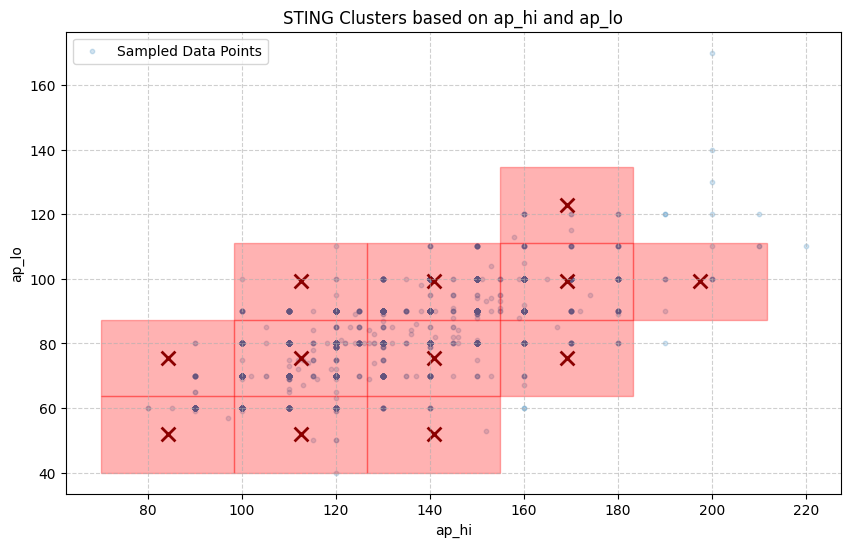

In [ ]:
# Chu·∫©n b·ªã d·ªØ li·ªáu cho tr·ª±c quan h√≥a
# T·∫°o DataFrame t·ª´ c√°c √¥ c·ª•m ƒë√£ t√¨m th·∫•y
if clusters_found_cells:
    cluster_data = []
    for cell in clusters_found_cells:
        # S·ª≠ d·ª•ng ƒëi·ªÉm trung t√¢m c·ªßa √¥ ho·∫∑c min/max coords ƒë·ªÉ bi·ªÉu di·ªÖn √¥
        center_point = (cell.min_coords + cell.max_coords) / 2
        cluster_data.append({
             numerical_features[0]: center_point[0],
             numerical_features[1]: center_point[1],
            'Min_0': cell.min_coords[0],
            'Max_0': cell.max_coords[0],
            'Min_1': cell.min_coords[1],
            'Max_1': cell.max_coords[1],
            'Count': cell.count,
            'Level': cell.level
        })

    df_clusters = pd.DataFrame(cluster_data)

    # Tr·ª±c quan h√≥a c√°c √¥ c·ª•m
    print("\n--- Tr·ª±c quan h√≥a k·∫øt qu·∫£ c·ª•m ---")

    # Bi·ªÉu ƒë·ªì Scatter plot c·ªßa d·ªØ li·ªáu g·ªëc v√† c√°c √¥ c·ª•m
    plt.figure(figsize=(10, 6))

    # L·∫•y d·ªØ li·ªáu g·ªëc sau PCA
    data_for_plot = data_for_sting # data_for_sting now contains the PCA results

    # V·∫Ω c√°c ƒëi·ªÉm d·ªØ li·ªáu g·ªëc (t√πy ch·ªçn, c√≥ th·ªÉ g√¢y qu√° t·∫£i n·∫øu d·ªØ li·ªáu l·ªõn)
    # Ch·ªâ v·∫Ω m·ªôt m·∫´u nh·ªè c√°c ƒëi·ªÉm ƒë·ªÉ tr√°nh qu√° t·∫£i
    sample_size = 5000 # ƒêi·ªÅu ch·ªânh k√≠ch th∆∞·ªõc m·∫´u n·∫øu c·∫ßn
    if len(data_for_plot) > sample_size:
        sample_indices = np.random.choice(len(data_for_plot), size=sample_size, replace=False)
        plt.scatter(data_for_plot[sample_indices, 0], data_for_plot[sample_indices, 1],
                    alpha=0.2, label='Sampled Data Points', s=10)
    else:
        plt.scatter(data_for_plot[:, 0], data_for_plot[:, 1],
                    alpha=0.2, label='All Data Points', s=10)


    # V·∫Ω c√°c √¥ c·ª•m d∆∞·ªõi d·∫°ng h√¨nh ch·ªØ nh·∫≠t
    for index, row in df_clusters.iterrows():
        # V·∫Ω h√¨nh ch·ªØ nh·∫≠t cho √¥ c·ª•m
        rect = plt.Rectangle((row['Min_0'], row['Min_1']),
                             row['Max_0'] - row['Min_0'],
                             row['Max_1'] - row['Min_1'],
                             fill=True, color='red', alpha=0.3, edgecolor='black', linewidth=1)
        plt.gca().add_patch(rect)

        # T√πy ch·ªçn: Th√™m t√¢m c·ªßa c·ª•m (s·ª≠ d·ª•ng min/max coords ƒë·ªÉ t√≠nh t√¢m trong kh√¥ng gian g·ªëc)
        center_x = (row['Min_0'] + row['Max_0']) / 2
        center_y = (row['Min_1'] + row['Max_1']) / 2
        plt.scatter(center_x, center_y, color='darkred', marker='x', s=100, linewidths=2)
        #plt.text(center_x, center_y, f"Count: {row['Count']}", fontsize=8, ha='center')


    plt.title(f'STING Clusters based on ap_hi and ap_lo')
    plt.xlabel('ap_hi')
    plt.ylabel('ap_lo')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

else:
    print("Kh√¥ng c√≥ c·ª•m n√†o ƒë∆∞·ª£c t√¨m th·∫•y ƒë·ªÉ tr·ª±c quan h√≥a. Vui l√≤ng ƒëi·ªÅu ch·ªânh ng∆∞·ª°ng m·∫≠t ƒë·ªô.")

# **EVALUATION**


--- Tr·ª±c quan h√≥a t·ª´ng √¥ c·ª•m ri√™ng bi·ªát ---

Bi·ªÉu ƒë·ªì cho √î c·ª•m 0 (Level 1, Count 875)


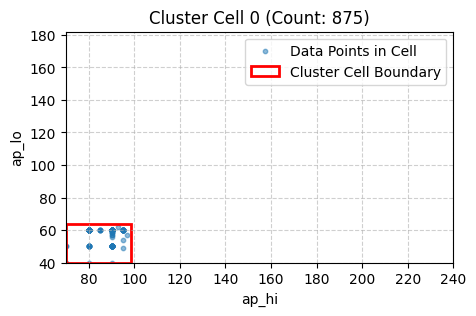


Bi·ªÉu ƒë·ªì cho √î c·ª•m 1 (Level 1, Count 184)


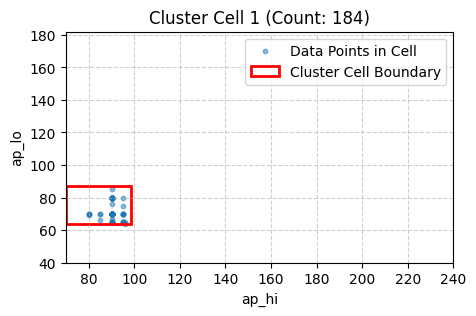


Bi·ªÉu ƒë·ªì cho √î c·ª•m 2 (Level 1, Count 1780)


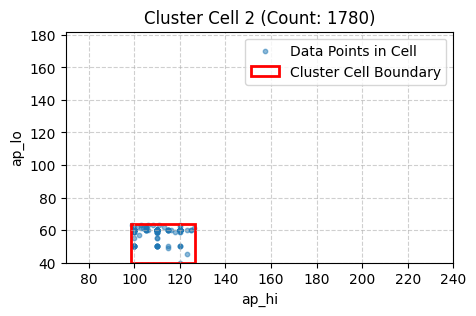


Bi·ªÉu ƒë·ªì cho √î c·ª•m 3 (Level 1, Count 36589)


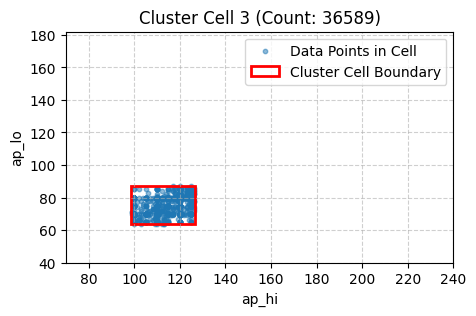


Bi·ªÉu ƒë·ªì cho √î c·ª•m 4 (Level 1, Count 1452)


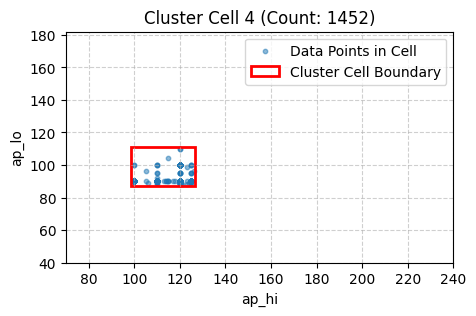


Bi·ªÉu ƒë·ªì cho √î c·ª•m 5 (Level 1, Count 152)


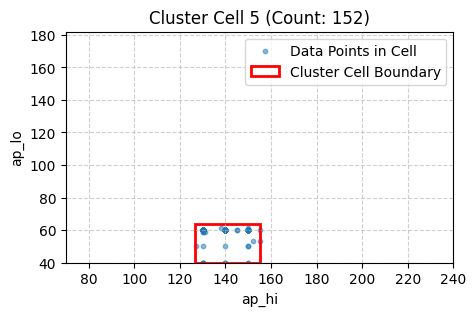


Bi·ªÉu ƒë·ªì cho √î c·ª•m 6 (Level 1, Count 8955)


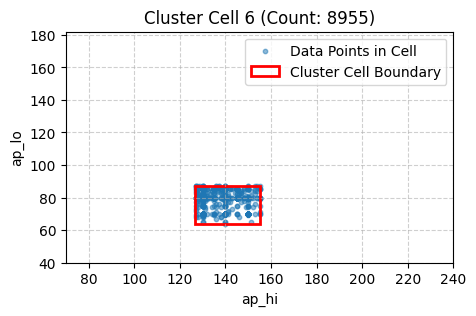


Bi·ªÉu ƒë·ªì cho √î c·ª•m 7 (Level 1, Count 14041)


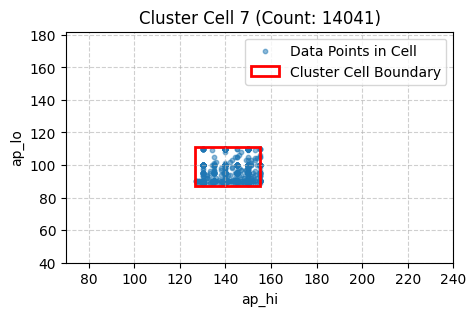


Bi·ªÉu ƒë·ªì cho √î c·ª•m 8 (Level 1, Count 588)


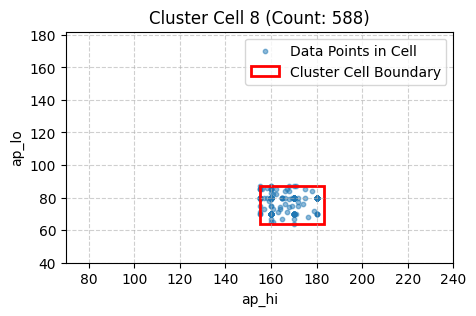


Bi·ªÉu ƒë·ªì cho √î c·ª•m 9 (Level 1, Count 3520)


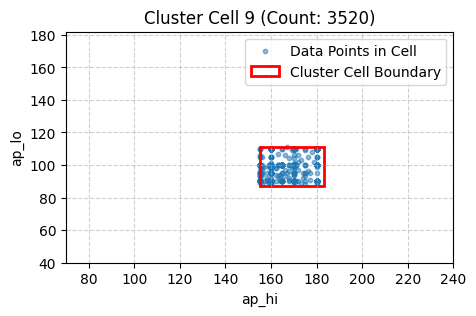


Bi·ªÉu ƒë·ªì cho √î c·ª•m 10 (Level 1, Count 143)


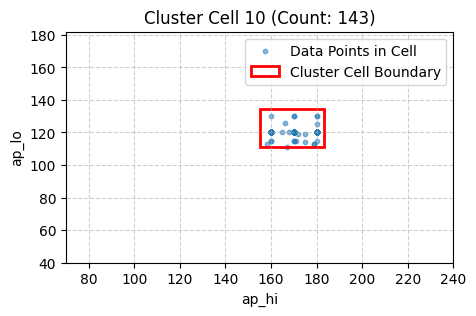


Bi·ªÉu ƒë·ªì cho √î c·ª•m 11 (Level 1, Count 170)


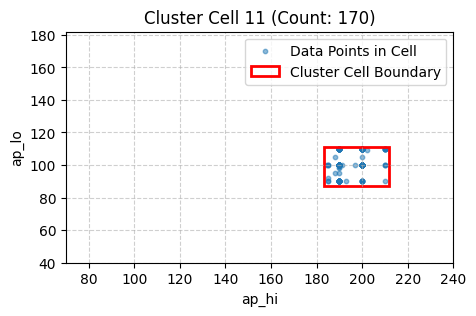

In [ ]:
print("\n--- Tr·ª±c quan h√≥a t·ª´ng √¥ c·ª•m ri√™ng bi·ªát ---")

if clusters_found_cells:
    for i, cell in enumerate(clusters_found_cells):
        print(f"\nBi·ªÉu ƒë·ªì cho √î c·ª•m {i} (Level {cell.level}, Count {cell.count})")

        # L·ªçc c√°c ƒëi·ªÉm d·ªØ li·ªáu g·ªëc n·∫±m trong ranh gi·ªõi c·ªßa √¥ c·ª•m hi·ªán t·∫°i
        points_in_cell = data_for_sting[
            np.all(data_for_sting >= cell.min_coords, axis=1) &
            np.all(data_for_sting <= cell.max_coords, axis=1)
        ]

        plt.figure(figsize=(5, 3))

        if len(points_in_cell) > 0:
            plt.scatter(points_in_cell[:, 0], points_in_cell[:, 1], alpha=0.5, s=10, label='Data Points in Cell')

        # V·∫Ω h√¨nh ch·ªØ nh·∫≠t bi·ªÉu di·ªÖn ranh gi·ªõi c·ªßa √¥ c·ª•m
        rect = plt.Rectangle((cell.min_coords[0], cell.min_coords[1]),
                             cell.max_coords[0] - cell.min_coords[0],
                             cell.max_coords[1] - cell.min_coords[1],
                             fill=False, color='red', linewidth=2, label='Cluster Cell Boundary')
        plt.gca().add_patch(rect)

        plt.title(f'Cluster Cell {i} (Count: {cell.count})')
        plt.xlabel(numerical_features[0])
        plt.ylabel(numerical_features[1])
        plt.xlim(data_min_bounds[0], data_max_bounds[0]) # Gi·ªØ tr·ª•c x c·ªë ƒë·ªãnh
        plt.ylim(data_min_bounds[1], data_max_bounds[1]) # Gi·ªØ tr·ª•c y c·ªë ƒë·ªãnh
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        plt.show()
else:
    print("Kh√¥ng c√≥ c·ª•m n√†o ƒë∆∞·ª£c t√¨m th·∫•y ƒë·ªÉ tr·ª±c quan h√≥a ri√™ng bi·ªát.")

In [ ]:
# --- T√≠nh to√°n c√°c ch·ªâ s·ªë ƒë√°nh gi√° c·ª•m ---

# B∆∞·ªõc 1: G√°n nh√£n c·ª•m cho t·ª´ng ƒëi·ªÉm d·ªØ li·ªáu d·ª±a tr√™n √¥ c·ª•m
# T·∫°o m·ªôt m·∫£ng nh√£n c·ª•m, ban ƒë·∫ßu g√°n -1 (nhi·ªÖu ho·∫∑c kh√¥ng thu·ªôc c·ª•m n√†o)
cluster_labels = np.full(len(data_for_sting), -1)

# G√°n nh√£n cho c√°c ƒëi·ªÉm d·ªØ li·ªáu n·∫±m trong c√°c √¥ c·ª•m ƒë√£ t√¨m th·∫•y
# M·ªói √¥ c·ª•m s·∫Ω ƒë∆∞·ª£c g√°n m·ªôt nh√£n duy nh·∫•t
cell_to_label = {id(cell): i for i, cell in enumerate(clusters_found_cells)}

for i, point in enumerate(data_for_sting):
    # T√¨m √¥ l√° m√† ƒëi·ªÉm thu·ªôc v·ªÅ (ƒë·ªÉ ƒë·∫£m b·∫£o nh·∫•t qu√°n v·ªõi c√°ch ch√®n d·ªØ li·ªáu)
    # C·∫ßn m·ªôt ph∆∞∆°ng th·ª©c trong l·ªõp STING ƒë·ªÉ t√¨m √¥ l√° cho m·ªôt ƒëi·ªÉm
    # Hi·ªán t·∫°i, ta c√≥ th·ªÉ l·∫∑p qua t·∫•t c·∫£ c√°c √¥ c·ª•m ƒë√£ t√¨m th·∫•y v√† ki·ªÉm tra
    for cell in clusters_found_cells:
        # Ki·ªÉm tra xem ƒëi·ªÉm c√≥ n·∫±m trong ranh gi·ªõi c·ªßa √¥ c·ª•m kh√¥ng
        if np.all(point >= cell.min_coords) and np.all(point <= cell.max_coords):
            cluster_labels[i] = cell_to_label[id(cell)]
            break # ƒêi·ªÉm ch·ªâ thu·ªôc v·ªÅ m·ªôt √¥ c·ª•m

# L·ªçc ra c√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c g√°n v√†o m·ªôt c·ª•m (nh√£n >= 0)
clustered_points_indices = cluster_labels >= 0
data_clustered = data_for_sting[clustered_points_indices]
labels_clustered = cluster_labels[clustered_points_indices]

print("\n--- ƒê√°nh gi√° hi·ªáu qu·∫£ gom c·ª•m ---")

if len(set(labels_clustered)) < 2 or len(data_clustered) < 2:
    print("Kh√¥ng ƒë·ªß c·ª•m ho·∫∑c ƒëi·ªÉm d·ªØ li·ªáu ƒë·ªÉ t√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°.")
else:
    # Silhouette Score: ƒêo l∆∞·ªùng m·ª©c ƒë·ªô t∆∞∆°ng ƒë·ªìng c·ªßa m·ªôt ƒë·ªëi t∆∞·ª£ng v·ªõi c·ª•m c·ªßa ch√≠nh n√≥ (ƒë·ªô k·∫øt d√≠nh)
    # so v·ªõi c√°c c·ª•m kh√°c (ƒë·ªô t√°ch bi·ªát). Gi√° tr·ªã cao h∆°n t·ªët h∆°n (g·∫ßn 1).
    try:
        silhouette_avg = silhouette_score(data_clustered, labels_clustered)
        print(f"Silhouette Score: {silhouette_avg:.4f}")
    except ValueError as e:
        print(f"Kh√¥ng th·ªÉ t√≠nh Silhouette Score: {e}")


    # Davies-Bouldin Index: ƒêo l∆∞·ªùng t·ª∑ l·ªá gi·ªØa s·ª± ph√¢n t√°n trong c·ª•m v√† kho·∫£ng c√°ch gi·ªØa c√°c t√¢m c·ª•m.
    # Gi√° tr·ªã th·∫•p h∆°n t·ªët h∆°n (g·∫ßn 0).
    try:
        db_index = davies_bouldin_score(data_clustered, labels_clustered)
        print(f"Davies-Bouldin Index: {db_index:.4f}")
    except ValueError as e:
         print(f"Kh√¥ng th·ªÉ t√≠nh Davies-Bouldin Index: {e}")


    # Calinski-Harabasz Index (Variance Ratio Criterion): ƒêo l∆∞·ªùng t·ª∑ l·ªá gi·ªØa
    # ph∆∞∆°ng sai gi·ªØa c√°c c·ª•m v√† ph∆∞∆°ng sai trong c·ª•m. Gi√° tr·ªã cao h∆°n t·ªët h∆°n.
    try:
        ch_index = calinski_harabasz_score(data_clustered, labels_clustered)
        print(f"Calinski-Harabasz Index: {ch_index:.4f}")
    except ValueError as e:
        print(f"Kh√¥ng th·ªÉ t√≠nh Calinski-Harabasz Index: {e}")


--- ƒê√°nh gi√° hi·ªáu qu·∫£ gom c·ª•m ---
Silhouette Score: 0.4288
Davies-Bouldin Index: 0.7351
Calinski-Harabasz Index: 32698.4386


In [ ]:
print("\n--- L·∫•y ra m·ªôt s·ªë m·∫´u trong m·ªói √¥ c·ª•m ---")

# Ki·ªÉm tra xem c√≥ c·ª•m n√†o ƒë∆∞·ª£c t√¨m th·∫•y kh√¥ng
if clusters_found_cells:
    sample_size_per_cell = 5 # S·ªë l∆∞·ª£ng m·∫´u mu·ªën l·∫•y t·ª´ m·ªói √¥ c·ª•m

    for i, cell in enumerate(clusters_found_cells):
        print(f"\n--- M·∫´u t·ª´ √î c·ª•m {i} (Level {cell.level}, Count {cell.count}) ---")

        # L·ªçc c√°c ƒëi·ªÉm d·ªØ li·ªáu g·ªëc n·∫±m trong ranh gi·ªõi c·ªßa √¥ c·ª•m hi·ªán t·∫°i
        # L∆∞u √Ω: Vi·ªác n√†y c√≥ th·ªÉ t·ªën b·ªô nh·ªõ n·∫øu t·∫≠p d·ªØ li·ªáu g·ªëc r·∫•t l·ªõn.
        # M·ªôt c√°ch hi·ªáu qu·∫£ h∆°n l√† l∆∞u tr·ªØ ch·ªâ s·ªë c·ªßa c√°c ƒëi·ªÉm trong m·ªói √¥ khi ch√®n d·ªØ li·ªáu,
        # nh∆∞ng ƒëi·ªÅu ƒë√≥ ƒë√≤i h·ªèi thay ƒë·ªïi c·∫•u tr√∫c l·ªõp GridCell.
        points_in_cell = data_for_sting[
            np.all(data_for_sting >= cell.min_coords, axis=1) &
            np.all(data_for_sting <= cell.max_coords, axis=1)
        ]

        if len(points_in_cell) > 0:
            # L·∫•y ng·∫´u nhi√™n m·ªôt s·ªë m·∫´u t·ª´ c√°c ƒëi·ªÉm trong √¥
            if len(points_in_cell) > sample_size_per_cell:
                sampled_points = points_in_cell[np.random.choice(len(points_in_cell), size=sample_size_per_cell, replace=False)]
            else:
                sampled_points = points_in_cell # L·∫•y t·∫•t c·∫£ n·∫øu s·ªë l∆∞·ª£ng √≠t h∆°n k√≠ch th∆∞·ªõc m·∫´u

            # T·∫°o DataFrame t·∫°m th·ªùi ƒë·ªÉ hi·ªÉn th·ªã m·∫´u d·ªÖ ƒë·ªçc h∆°n
            # S·ª≠ d·ª•ng features_for_sting l√†m t√™n c·ªôt v√¨ data_for_sting hi·ªán l√† d·ªØ li·ªáu PCA
            df_sampled = pd.DataFrame(sampled_points, columns=numerical_features)
            print(df_sampled)
        else:
            print("√î n√†y ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† c·ª•m nh∆∞ng kh√¥ng c√≥ ƒëi·ªÉm d·ªØ li·ªáu g·ªëc n√†o n·∫±m ch√≠nh x√°c trong ranh gi·ªõi sau khi l·ªçc.")

else:
    print("Kh√¥ng c√≥ c·ª•m n√†o ƒë∆∞·ª£c t√¨m th·∫•y, kh√¥ng th·ªÉ l·∫•y m·∫´u.")


--- L·∫•y ra m·ªôt s·ªë m·∫´u trong m·ªói √¥ c·ª•m ---

--- M·∫´u t·ª´ √î c·ª•m 0 (Level 1, Count 875) ---
   ap_hi  ap_lo
0     90     50
1     90     60
2     90     60
3     90     60
4     90     60

--- M·∫´u t·ª´ √î c·ª•m 1 (Level 1, Count 184) ---
   ap_hi  ap_lo
0     90     70
1     90     70
2     90     70
3     90     70
4     90     65

--- M·∫´u t·ª´ √î c·ª•m 2 (Level 1, Count 1780) ---
   ap_hi  ap_lo
0    100     60
1    120     60
2    120     60
3    100     60
4    105     60

--- M·∫´u t·ª´ √î c·ª•m 3 (Level 1, Count 36589) ---
   ap_hi  ap_lo
0    120     70
1    120     80
2    120     80
3    100     70
4    100     70

--- M·∫´u t·ª´ √î c·ª•m 4 (Level 1, Count 1452) ---
   ap_hi  ap_lo
0    120    100
1    110     90
2    120     90
3    120     90
4    120     90

--- M·∫´u t·ª´ √î c·ª•m 5 (Level 1, Count 152) ---
   ap_hi  ap_lo
0    130     60
1    130     60
2    130     60
3    130     60
4    130     60

--- M·∫´u t·ª´ √î c·ª•m 6 (Level 1, Count 8955) ---